# Guild calculations and barplots

# 0) Import needed data

### a) Silva OTUs

In [1]:
# mirroring from `SF_Guild_OTU bars etc...

In [2]:
# otu_V <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t')

In [3]:
suppressWarnings(suppressMessages(library(dplyr)))
library(magrittr)
`%notin%` <- Negate(`%in%`)

In [4]:
# Import OTU Table
SilvaOTUs <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t')#, row.names=1)
row.names(SilvaOTUs) <- SilvaOTUs[,"OTU"]                                # Make OTU row names -- required!!!

In [5]:
#SilvaOTUs# [SilvaOTUs=='Archaea']

In [6]:
# SilvaOTUs["OTU"]  # row.names(SilvaOTUs) # 
otu_V <- SilvaOTUs

In [7]:
# Sort OTU table                                                                      
otu_V <- otu_V[order(otu_V$Consensus.lineage),]                                                         # sort by lineage

# Make new top level plotting var (should be in PRE-PROCESS ? )
otu_V$Taxonomy <- ifelse(otu_V$Phylum == "Proteobacteria", paste(otu_V$Class), paste(otu_V$Phylum))    # head(otu_V)
otu_V <- data.frame(otu_V)

In [8]:
#SilvaOTUs

In [9]:
# OTU_v <- read.table("SF_Sal_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)                          
# dim(OTU_v); head(OTU_v)
# OTU_v <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)                          
# dim(OTU_v); head(OTU_v)

In [10]:
# Silva OTUs, Delta Only (Use code from Get_16S_correlations.ipynb)            
OTU_samps <- data.frame('Sample' = colnames(otu_V))                                        # OTU_samps
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)     
Meta_iTag <- merge(metaDB, OTU_samps, by = 'Sample')                                       #colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample
Meta_iTag_FW <- Meta_iTag[Meta_iTag$SALTgroup == "FW",] # Freshwater
Meta_iTag_Oligo <- Meta_iTag[Meta_iTag$SALTgroup == "Oligo",] # Oligo
Meta_iTag_Delta <- rbind(Meta_iTag_FW, Meta_iTag_Oligo)                  # Meta_iTag_Delta
Delta_sites <- Meta_iTag_Delta[,"Sample"]                                # Delta sites
tax_cols <- unlist(list("Consensus.lineage", "Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Taxonomy"))
Delta_tax <- append(Delta_sites, tax_cols)
Delta_OTU <- otu_V %>%
    dplyr::select(names(Delta_tax))

# 1) Calculate aggregate guild abundances

#### ***DUE TO ISSUES WITH SILVA***

- **NOTE CHANGED MOB IIa to Family=='Beijerinckiaceae', "MOB_IIa"** 
- FROM Family=='Methylocystaceae', "MOB_IIa",  (as in Kneif 2015)

due to taxonomic reassingment in SILVA (elsewhere)???  These were in Family=='Methylocystaceae' before
"k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__Methylosinus"
"k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__Methylocystis"

- **Note ALSO had to change (no CH4ac) **
- from: Order=='Methanosarcinales'
- to:   Order=='Methanosarciniales'

- also added Deferrisomatota to FeRB

In [11]:
# source("../modules/OTU_subsetting_modules_v.0.3_strip.R")   # ITAGGER VERSION # MOB IIa == Methylocystaceae
source("../modules/3_OTU_subsetting_modules_v.0.4_strip.r")  # SILVA VERSION    # MOB IIa == Beijerinckiaceae 

In [12]:
head(otu_V, n = 20)

,OTU,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
otu_1614,otu_1614,0.000000,0.000000,0.0000,0.00000,11.6117,0.00000,15.624023,0.000000,0.00000,⋯,0.000000,0.00000,k__Archaea;p__;c__;o__;f__;g__,Archaea,,PH,PH,PH,PH,
otu_3660,otu_3660,0.000000,7.899331,0.0000,0.00000,0.0000,0.00000,0.000000,0.000000,0.00000,⋯,0.000000,0.00000,k__Archaea;p__;c__;o__;f__;g__,Archaea,,PH,PH,PH,PH,
otu_4420,otu_4420,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000000,0.000000,0.00000,⋯,0.000000,0.00000,k__Archaea;p__;c__;o__;f__;g__,Archaea,,PH,PH,PH,PH,
otu_4814,otu_4814,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000000,0.000000,0.00000,⋯,0.000000,0.00000,k__Archaea;p__Aenigmarchaeota;c__Aenigmarchaeia;o__Aenigmarchaeales;f__;g__,Archaea,Aenigmarchaeota,Aenigmarchaeia,Aenigmarchaeales,AenigmarchaealesOR,AenigmarchaealesOR,Aenigmarchaeota
otu_1912,otu_1912,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000000,7.241759,0.00000,⋯,0.000000,0.00000,k__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Cand. Altiarchaeum,Archaea,Altiarchaeota,Altiarchaeia,Altiarchaeales,Altiarchaeaceae,Cand. Altiarchaeum,Altiarchaeota
otu_5947,otu_5947,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000000,7.241759,0.00000,⋯,0.000000,0.00000,k__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Cand. Altiarchaeum,Archaea,Altiarchaeota,Altiarchaeia,Altiarchaeales,Altiarchaeaceae,Cand. Altiarchaeum,Altiarchaeota
otu_1561,otu_1561,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,7.812012,0.000000,0.00000,⋯,0.000000,6.88056,k__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;o__;f__;g__,Archaea,Asgardarchaeota,Lokiarchaeia,LokiarchaeiaCL,LokiarchaeiaCL,LokiarchaeiaCL,Asgardarchaeota
otu_5167,otu_5167,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000000,0.000000,0.00000,⋯,0.000000,0.00000,k__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;o__;f__;g__,Archaea,Asgardarchaeota,Lokiarchaeia,LokiarchaeiaCL,LokiarchaeiaCL,LokiarchaeiaCL,Asgardarchaeota
otu_1022,otu_1022,0.000000,7.899331,0.0000,31.03036,0.0000,0.00000,0.000000,0.000000,0.00000,⋯,8.772315,27.52224,k__Archaea;p__Crenarchaeota;c__;o__;f__;g__,Archaea,Crenarchaeota,CrenarchaeotaPH,CrenarchaeotaPH,CrenarchaeotaPH,CrenarchaeotaPH,Crenarchaeota


In [13]:
rownames(otu_V)[1:10]

[1] "otu_1614" "otu_3660" "otu_4420" "otu_4814" "otu_1912" "otu_5947"
 [7] "otu_1561" "otu_5167" "otu_1022" "otu_1024"

In [14]:
# use function for getting 16s Guilds
Guild_OTUs2 <- Get_16S_Guilds(otu_V)              # use Get_16S_Guilds to get guilds
OTU_guilds2 <- merge(Guild_OTUs2, otu_V)
# Guild_OTUs <- Get_16S_Guilds(SilvaOTUs)              # use Get_16S_Guilds to get guilds

# Update - use 4 methanogen guilds! (CH4_ac, CH4_H2, CH4_me, CH4_mix)
### Also some other updates
### Include Methermicoccaceae (doesn't start with Methano)
### Remove Methanoperedens (starts with Methano but isn't methanogen). Also remove ANME and Syntrophoarchaeaceae.
### Mixotrophs are Methanosarcinaceae and Methanobacteriaceae
### Acetoclasts are Methanosaetaceae and Methanotrichaceae
### CH4_me are Methanomassiliicoccales, Methanonatronarchaeales, Methermicoccaceae
### CH4_H2 are all others

In [15]:
# use alternate function to get new methanogen guilds
Guild_OTUs4 <- Get_16S_Guilds_alt(otu_V)
Guild_OTUs <- Get_16S_Guilds_alt(otu_V)

In [16]:
OTU_guilds4 <- merge(Guild_OTUs4, otu_V)
OTU_guilds <- merge(Guild_OTUs, otu_V)

In [17]:
# dim(Guild_OTUs); head(Guild_OTUs)

In [18]:
#Guild_OTUs[Guild_OTUs['Guild'] == 'CH4_H2']
#Guild_OTUs[Guild_OTUs['Guild'] == 'SRB']

In [19]:
#otu_V["OTU"] <- row.names(otu_V)
# OTU_guilds <- merge(Guild_OTUs, otu_V)#, by="OTU")# all.y=TRUE)
head(OTU_guilds)# ; tail(OTU_guilds)

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,otu_1019,SRB,0.0000,15.79866,0.000,0.00000,0.0000,0.00000,15.624023,0.000000,⋯,8.772315,0.00000,k__Bacteria;p__Desulfobacterota;c__Desulfobulbia;o__Desulfobulbales;f__Desulfobulbaceae;g__,Bacteria,Desulfobacterota,Desulfobulbia,Desulfobulbales,Desulfobulbaceae,DesulfobulbaceaeFA,Desulfobacterota
2,otu_1025,MOB_II,0.0000,0.00000,0.000,0.00000,0.0000,0.00000,0.000000,0.000000,⋯,0.000000,0.00000,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA,Alphaproteobacteria
3,otu_103,SRB,354.0123,134.28863,0.000,62.06073,336.7394,114.87915,1859.258796,811.076994,⋯,0.000000,6.88056,k__Bacteria;p__Desulfobacterota;c__Desulfobacteria;o__Desulfobacterales;f__Desulfosarcinaceae;g__Desulfatirhabdium,Bacteria,Desulfobacterota,Desulfobacteria,Desulfobacterales,Desulfosarcinaceae,Desulfatirhabdium,Desulfobacterota
4,otu_1034,SRB_syn,0.0000,0.00000,0.000,0.00000,0.0000,0.00000,0.000000,0.000000,⋯,0.000000,0.00000,k__Bacteria;p__Desulfobacterota;c__Syntrophobacteria;o__Syntrophobacterales;f__Syntrophobacteraceae;g__Syntrophobacter,Bacteria,Desulfobacterota,Syntrophobacteria,Syntrophobacterales,Syntrophobacteraceae,Syntrophobacter,Desulfobacterota
5,otu_104,AOB,0.0000,23.69799,1771.479,31.03036,0.0000,53.61027,62.496094,0.000000,⋯,3658.055178,2600.85181,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32,Gammaproteobacteria
6,otu_1051,MOB_I,0.0000,0.00000,0.000,15.51518,0.0000,7.65861,7.812012,7.241759,⋯,61.406202,20.64168,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera,Gammaproteobacteria


In [20]:
levels(OTU_guilds[,2])

[1] "CH4_mix" "CH4_H2"  "CH4_ac"  "CH4_me"  "MOB_I"   "MOB_II"  "MOB_IIa"
 [8] "ANME"    "AOA"     "AOB"     "NOB"     "Anamx"   "SOxB"    "SRB_syn"
[15] "SRB"     "FeOB"    "FeRB"

In [21]:
# write.table(OTU_guilds, "Silva_OTU_Guild_taxa_counts.txt", row.names=T, col.names=T, sep='\t')

In [22]:
# OTU_guilds['Guild'] == 'MOB_IIa'

In [23]:
#OTU_guilds[OTU_guilds['Guild'] == 'MOB_IIa',]

# 2) Plot guild abundances

In [24]:
# source("../modules/5_OTU_barplots_module_v0.3.7.R")
source("../modules/5_OTU_barplots_module_v0.4.R")       # working under R 4.0.2

In [25]:
# Get guilds color scheme and update to have 17 colors for the 2 new methanogen guilds
# Note no MeOB anymore, but ANME present so sub that in
#Guild_cols <- read.table("../data/colors/Guild_color_palette.txt", sep='\t')
#Guild_vars <-c("Guild", "G_index", "color")
#Guild_cols <- Guild_cols[Guild_vars]
#colnames(Guild_cols) <- c("Guild", "Index", "color")
#Guild_cols['Index'] <- rev(Guild_cols[,'Index'])
Guild_cols <- read.table("../data/colors/Guild_color_palette.txt", sep='\t') %>%
  dplyr::select(Guild, G_index, color) %>%
  set_names(c("Guild", "Index", "color")) %>%
  mutate(Index = rev(Index)) %>%
  add_row(Guild = "CH4_me", Index = 16, color = "#FDC086") %>%
  add_row(Guild = "CH4_mix", Index = 17, color = "#FFFF99") %>%
  arrange(Index) %>%
  mutate(Guild = gsub("MeOB", "ANME", Guild))
Guild_cols

,Guild,Index,color
,<chr>,<dbl>,<chr>
15,FeRB,1,#8B4513
14,FeOB,2,#CD6600
13,SRB,3,#8B008B
12,SRB_syn,4,#CD2990
11,SOxB,5,#CD69C9
10,Anamx,6,#00FF7F
9,NOB,7,#008B00
8,AOB,8,#00CD00
7,AOA,9,#7CFC00


In [26]:
# Susannah feedback - need to make NOB darker
Guild_cols$color[7] <- "darkgreen"

In [27]:
# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)               # site_colors
colnames(site_colors) <- c('color','Location')                                                        # site_colors
site_colours <- (site_colors$color)                          

In [28]:
## REPLOT without SRB
#nope <- as.list("SRB, SRB_syn")
noSRB <- OTU_guilds[!OTU_guilds$Guild=="SRB",]
noSRBs <- noSRB[!noSRB$Guild=="SRB_syn",]
noSROBs <- noSRBs[!noSRBs$Guild=="SOxB",]
noFeRB <- noSROBs[!noSROBs$Guild=="FeRB",]
noFeROB <- noFeRB[!noFeRB$Guild=="FeOB",]
clean_guilds <- noFeROB[!noFeROB$Guild=="MeOB",]
#Guilds_noSRB <- OTU_guilds[!SRB]
#Guilds_noSRB
head(clean_guilds)

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.000000,0.000000,⋯,0.00000,0.00000,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA,Alphaproteobacteria
5,otu_104,AOB,0.00000,23.69799,1771.479,31.03036,0.00000,53.61027,62.496094,0.000000,⋯,3658.05518,2600.85181,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32,Gammaproteobacteria
6,otu_1051,MOB_I,0.00000,0.00000,0.000,15.51518,0.00000,7.65861,7.812012,7.241759,⋯,61.40620,20.64168,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera,Gammaproteobacteria
13,otu_1067,NOB,377.10002,94.79197,0.000,124.12145,359.96284,137.85498,320.292482,173.802213,⋯,0.00000,0.00000,k__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__Nitrospiraceae;g__Nitrospira,Bacteria,Nitrospirota,Nitrospiria,Nitrospirales,Nitrospiraceae,Nitrospira,Nitrospirota
15,otu_1072,AOB,177.00613,110.59063,0.000,62.06073,81.28193,122.53776,70.308106,50.692312,⋯,26.31694,48.16392,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,MND1,Gammaproteobacteria
30,otu_1156,NOB,38.47959,86.89264,1771.479,155.15182,92.89364,176.14803,124.992188,94.142865,⋯,0.00000,13.76112,k__Bacteria;p__Nitrospirota;c__4-29-1;o__;f__;g__,Bacteria,Nitrospirota,4-29-1,4-29-1CL,4-29-1CL,4-29-1CL,Nitrospirota


In [29]:
metaDB <- read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...

In [30]:
#metaDB

## Figure 4 (formerly 4a)

Using Guild as id variables



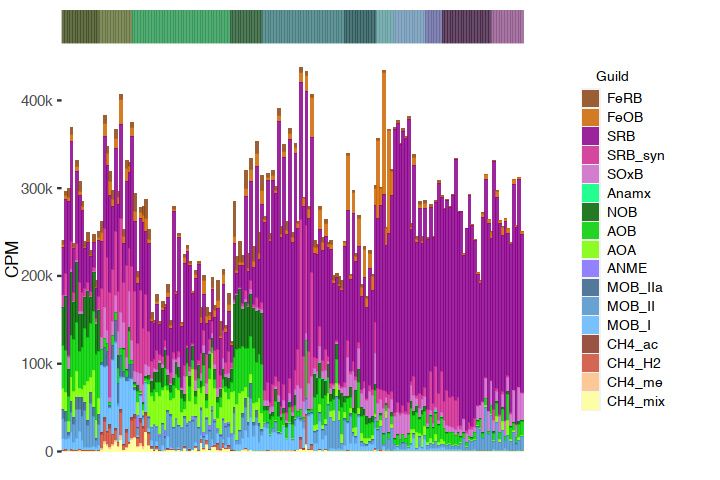

In [31]:
source("../modules/5_OTU_barplots_module_v0.4.R") # Reload here for convenience

Site_sort_G <- abund_loc_barplot_guild(OTU_guilds, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols)

options(repr.plot.width=6, repr.plot.height=4) 
Site_sort_G

#pdf("../figs/Figure4.pdf", width = 6, height = 4)
#Site_sort_G
#dev.off()

Using Guild as id variables



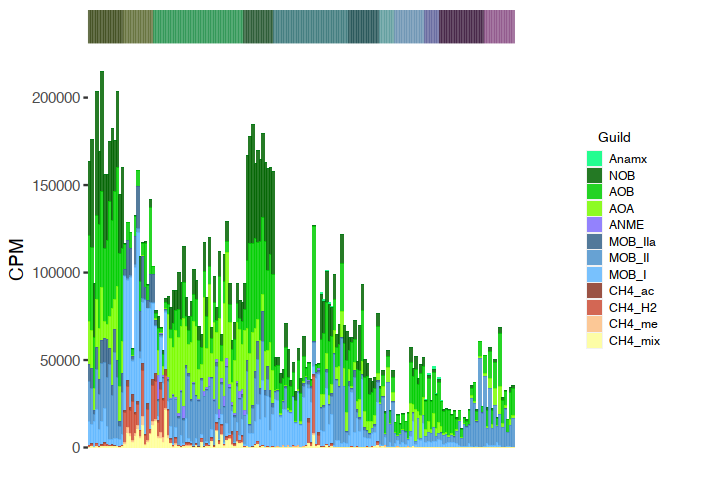

In [32]:
Site_sort_G <- abund_loc_barplot(clean_guilds, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols)
Site_sort_G

# Alternate Figure 4 (heatmap)
#### Suggested by Connor so trying it. Decided not to use it though.
#### source("../modules/7_Corr_heatmap_module_v0.1.R")
source("../modules/8_Guild_corr_heatmaps_v0.0.r")Use some code from Figure S9 (Guild_correlation_heatmaps.ipynb)

In [32]:
source("../modules/7_Corr_heatmap_module_v0.1.R")
source("../modules/8_Guild_corr_heatmaps_v0.0.r")

In [33]:
plot_guild_log2_abund_site_colorbar(OTU_guilds, metaDB, site_colors, OTU_guilds)

Warning message:
“non-unique values when setting 'row.names': ‘[Desulfobacterium] catecholicum group’, ‘4-29-1CL’, ‘966-1’, ‘Anaerosinus’, ‘BradymonadalesOR’, ‘Cand. Deferrimonas’, ‘Cand. Electrothrix’, ‘Cand. Methanofastidiosum’, ‘Cand. Nitrosopumilus’, ‘Cand. Nitrososphaera’, ‘Cand. Nitrotoga’, ‘Cand. Scalindua’, ‘Cand. Thiobios’, ‘Cand. Thiodiazotropha’, ‘Citrifermentans’, ‘Cm1-21’, ‘Crenothrix’, ‘Deferrisoma’, ‘Desulfatiglans’, ‘Desulfatirhabdium’, ‘Desulfatitalea’, ‘Desulfobacca’, ‘DesulfobacteralesOR’, ‘DesulfobacterotaPH’, ‘DesulfobulbaceaeFA’, ‘DesulfobulbalesOR’, ‘Desulfobulbus’, ‘Desulfocapsa’, ‘DesulfocapsaceaeFA’, ‘Desulfocarbo’, ‘DesulfococcaceaeFA’, ‘Desulfofustis’, ‘Desulfomonile’, ‘Desulfopila’, ‘Desulforhopalus’, ‘Desulfosarcina’, ‘DesulfosarcinaceaeFA’, ‘Desulfosporosinus’, ‘Desulfovibrio’, ‘Desulfovirga’, ‘Desulfurivibrio’, ‘DesulfuromonadaceaeFA’, ‘DesulfuromonadalesOR’, ‘Desulfuromonas’, ‘Ellin6067’, ‘GallionellaceaeFA’, ‘Geoalkalibacter’, ‘Geobacter’, ‘Geobacterac

ERROR: Error in `.rowNamesDF<-`(x, value = value): duplicate 'row.names' are not allowed


In [34]:
# Or try pheatmap
library(pheatmap)
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.3     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()
✖ Hmisc::src()       masks dplyr::src()
✖ Hmisc::summarize() masks dplyr::summarize()



In [35]:
# Break up function to get right dataframe for plotting
otu_tab <- OTU_guilds
agg_var <- "Guild"
Meta_itag <- metaDB
order_var <- "EWsiteHyd_index"
plot <- ""
colors <- Guild_cols
#color_set
relab = "CPM"

In [36]:
ifelse(relab == "CPM", otu_tab <- otu_tab, otu_tab <- perc_abund(otu_tab))          # if not CPM, apply perc_abund
y_lab=substitute(relab)
    
otu_agg <- agg_by_cat(otu_tab, agg_var)                                            # Agg by cat (Fxn. 1) on agg_var
otu_S <- sort_otu_agg_by_meta(otu_agg, Meta_iTag, "Sample", order_var)             # Sort agg by (Fxn. n) on agg

[[1]]
  [1] "otu_1019" "otu_1025" "otu_103"  "otu_1034" "otu_104"  "otu_1051"
  [7] "otu_1052" "otu_1055" "otu_1057" "otu_106"  "otu_1063" "otu_1064"
 [13] "otu_1067" "otu_1068" "otu_1072" "otu_1076" "otu_1085" "otu_1088"
 [19] "otu_1096" "otu_11"   "otu_1110" "otu_1120" "otu_1121" "otu_1131"
 [25] "otu_1133" "otu_1145" "otu_1146" "otu_115"  "otu_1152" "otu_1156"
 [31] "otu_1158" "otu_1166" "otu_1169" "otu_1181" "otu_1185" "otu_119" 
 [37] "otu_1195" "otu_12"   "otu_1206" "otu_1207" "otu_121"  "otu_1212"
 [43] "otu_1218" "otu_122"  "otu_1221" "otu_1224" "otu_123"  "otu_1241"
 [49] "otu_1243" "otu_1246" "otu_1250" "otu_1255" "otu_126"  "otu_1261"
 [55] "otu_1267" "otu_1274" "otu_1278" "otu_1279" "otu_1283" "otu_1286"
 [61] "otu_130"  "otu_1306" "otu_1308" "otu_1314" "otu_1321" "otu_133" 
 [67] "otu_1340" "otu_1356" "otu_1358" "otu_1360" "otu_1363" "otu_137" 
 [73] "otu_139"  "otu_1391" "otu_14"   "otu_1411" "otu_1419" "otu_1454"
 [79] "otu_1456" "otu_1468" "otu_1469" "otu_1477" "otu_1481" "otu_1487"
 [85] "otu_1488" "otu_1489" "otu_149"  "otu_1498" "otu_1500" "otu_1506"
 [91] "otu_151"  "otu_1526" "otu_1527" "otu_1531" "otu_154"  "otu_1543"
 [97] "otu_155"  "otu_1574" "otu_158"  "otu_159"  "otu_1591" "otu_1595"
[103] "otu_1596" "otu_1604" "otu_1609" "otu_1610" "otu_1621" "otu_1626"
[109] "otu_1629" "otu_1645" "otu_1649" "otu_1653" "otu_1668" "otu_1672"
[115] "otu_168"  "otu_1681" "otu_1683" "otu_1688" "otu_169"  "otu_1691"
[121] "otu_1699" "otu_173"  "otu_1734" "otu_1735" "otu_1755" "otu_1771"
[127] "otu_1784" "otu_1785" "otu_1788" "otu_1798" "otu_18"   "otu_1820"
[133] "otu_1824" "otu_1829" "otu_1840" "otu_1846" "otu_185"  "otu_1862"
[139] "otu_1864" "otu_187"  "otu_1871" "otu_1872" "otu_1875" "otu_189" 
[145] "otu_1891" "otu_19"   "otu_1911" "otu_1915" "otu_1919" "otu_193" 
[151] "otu_1939" "otu_194"  "otu_1940" "otu_195"  "otu_1953" "otu_196" 
[157] "otu_1962" "otu_1978" "otu_199"  "otu_2"    "otu_20"   "otu_200" 
[163] "otu_2004" "otu_201"  "otu_2015" "otu_2017" "otu_2023" "otu_2027"
[169] "otu_2039" "otu_2051" "otu_2052" "otu_2058" "otu_2063" "otu_2080"
[175] "otu_2082" "otu_2086" "otu_209"  "otu_2092" "otu_2094" "otu_2098"
[181] "otu_21"   "otu_210"  "otu_2100" "otu_2103" "otu_2104" "otu_2109"
[187] "otu_211"  "otu_2110" "otu_2113" "otu_2117" "otu_2124" "otu_2133"
[193] "otu_2135" "otu_2137" "otu_2148" "otu_2152" "otu_2158" "otu_2160"
[199] "otu_2162" "otu_217"  "otu_2175" "otu_2180" "otu_2203" "otu_2206"
[205] "otu_2210" "otu_2212" "otu_2214" "otu_2232" "otu_2234" "otu_2238"
[211] "otu_2244" "otu_2250" "otu_2255" "otu_2256" "otu_2265" "otu_2269"
[217] "otu_229"  "otu_23"   "otu_230"  "otu_2315" "otu_2321" "otu_2325"
[223] "otu_2332" "otu_2345" "otu_235"  "otu_2353" "otu_2364" "otu_2366"
[229] "otu_2380" "otu_2387" "otu_2397" "otu_2399" "otu_24"   "otu_2403"
[235] "otu_2404" "otu_2405" "otu_2415" "otu_2420" "otu_2421" "otu_2434"
[241] "otu_2460" "otu_2469" "otu_247"  "otu_2472" "otu_248"  "otu_2480"
[247] "otu_2484" "otu_2493" "otu_2502" "otu_2509" "otu_252"  "otu_2523"
[253] "otu_2529" "otu_2534" "otu_2536" "otu_2537" "otu_2538" "otu_2543"
[259] "otu_2548" "otu_2556" "otu_2568" "otu_2570" "otu_2593" "otu_260" 
[265] "otu_2613" "otu_2633" "otu_265"  "otu_266"  "otu_2665" "otu_268" 
[271] "otu_2680" "otu_2687" "otu_2688" "otu_2690" "otu_27"   "otu_2711"
[277] "otu_2714" "otu_272"  "otu_2720" "otu_2732" "otu_274"  "otu_2749"
[283] "otu_2772" "otu_2782" "otu_2786" "otu_2787" "otu_2788" "otu_2789"
[289] "otu_279"  "otu_2790" "otu_28"   "otu_2806" "otu_2810" "otu_2816"
[295] "otu_282"  "otu_283"  "otu_2831" "otu_2834" "otu_284"  "otu_285" 
[301] "otu_2858" "otu_2859" "otu_2870" "otu_2873" "otu_2878" "otu_2882"
[307] "otu_2891" "otu_2899" "otu_2902" "otu_2903" "otu_2918" "otu_2941"
[313] "otu_2952" "otu_2956" "otu_296"  "otu_2963" "otu_2967" "otu_2971"
[319] "otu_298"  "otu_2982" "otu_2992" "otu_3"    "otu_30"   "otu_3010"
[325] "otu_3013" "otu_3016" "otu_3038" "otu_3051" "otu_3059" "otu_3075"
[331] "otu_3082" "otu_309"  "otu_3

In [37]:
# If color palette not specified, make new & sort
ifelse(colors=="",                                                                 
       colors_p <- Taxon_bar_newC(otu_agg, min_abund=0.005, color_set, output_palette=T), 
       colors <- colors)
ifelse(colors=="",
       colors <- Sort_new_palette(colors_p, agg_var, "Consensus.lineage", otu_tab),
       colors <- colors)

[[1]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[2]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[3]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[4]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[5]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[6]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[7]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[8]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[9]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[10]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[11]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[12]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[13]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[14]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[15]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[16]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[17]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[18]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[19]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[20]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[21]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[22]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[23]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[24]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[25]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[26]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[27]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3

[[1]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[2]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[3]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[4]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[5]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[6]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[7]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[8]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[9]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[10]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[11]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[12]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[13]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[14]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[15]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[16]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[17]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[18]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[19]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[20]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[21]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[22]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[23]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[24]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3626"
[15] "#CD4F39" "#FDC086" "#FFFF99"

[[25]]
 [1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "ANME"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

[[26]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[27]]
 [1] "#8B4513" "#CD6600" "#8B008B" "#CD2990" "#CD69C9" "#00FF7F" "#008B00"
 [8] "#00CD00" "#7CFC00" "#836FFF" "#36648B" "#4F94CD" "#63B8FF" "#8B3

In [38]:
# make recolored barplot, separate plot and legend
bar_plot <- recolor_barplot(otu_S, colors, ylab=y_lab) + # reuse existing palette 
                theme(legend.title = element_text(size = 8, margin = margin(t = 0, r = 0, b = 0, l = 0)),
                      legend.title.align = 0.3,
                      legend.text = element_text(size = 8),
                      legend.key.height = unit(0.4, "cm"),
                      legend.key.width = unit(0.4, "cm"),)
bar_plotNL <- bar_plot + 
    scale_y_continuous(breaks = c(0, 100000, 200000, 300000, 400000),
                       labels = c("0", "100k", "200k", "300k", "400k")) + # put axis on right side  
    theme(legend.position = "none",
          plot.margin = unit(c(0.1, -0.5, 0.1, 0.1), "cm"),
                          axis.title.y = element_text(size = 10, margin = margin(t = 0, r = 0, b = 0, l = 0)))   # drop legend from ggplot, rotate y axis title, min. margins    
      
    legend <- get_legend(bar_plot)                                                      # get legend as separate obj.

Using Guild as id variables



In [39]:
# Make site_barplot for top
plot_s <- substitute(plot)
sb <- site_colbar(Meta_iTag,"Sample", "Location", site_colors, order_var, plot_s)

In [40]:
# make plot grid of site colors and abundance barplot
ifelse(plot=="graph", proportion <- c(1/4,3/4), proportion <- c(1/8,7/8))          # set proportion for graph
pg <- plot_grid(sb, bar_plotNL, align="v", nrow=2, rel_heights = c(2, 20), axis = "b")       # plot grid, by proportion 
pgl <- plot_grid(pg, legend, rel_widths = c(8,3), align = "h", ncol = 2, axis = "l") # add legend to grid, better alignment later...align="h", ncol=2, 

[1] 0.125

In [41]:
# Reorder
otu_S <- otu_S %>% 
    mutate(Order = seq(1:17)) %>%
    arrange(desc(Order))

In [42]:
otu_S$Order[14] <- 1.5

In [43]:
otu_S <- otu_S %>% 
    arrange(desc(Order))
otu_S

Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,⋯,Muzzi_CordB_D2,Muzzi_CordC_D1,Muzzi_CordC_D2,Muzzi_PWA_D1,Muzzi_PWA_D2,Muzzi_PWB_D1,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2,Order
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FeRB,5063.91461,4597.41060,9743.136,7928.2578,4725.96377,7206.75183,10421.2237,5300.96750,6895.67355,⋯,7.448019e+02,503.9132,818.33675,4.310179e+02,1.763796e+02,3.603912e+02,421.8519,447.38804,454.11698,17.0
FeOB,2732.05119,5031.87380,5314.438,7711.0453,1881.09614,4939.80333,4718.4551,4989.57187,1057.85901,⋯,8.647978e+03,3779.3490,5270.38897,1.908794e+03,5.363542e+03,2.449438e+03,2320.1856,3114.17167,6495.24897,16.0
SRB,54494.80141,83851.39779,175376.439,114610.6465,49419.41477,82567.47235,99845.3222,92643.82133,45820.96716,⋯,1.777732e+05,226493.2365,161294.92406,1.909948e+05,2.348815e+05,2.244443e+05,236448.0067,180060.52897,251339.98913,15.0
SRB_syn,12929.14368,25025.08038,1771.479,31976.7893,10253.13516,19613.69972,32458.9088,22326.34262,8893.85168,⋯,3.379194e+03,1094.4365,2372.42581,1.878007e+03,3.367246e+02,1.356048e+03,421.8519,973.72692,612.36987,14.0
SOxB,1862.41236,1919.53742,13286.094,3072.0060,1927.54296,2381.82765,3491.9693,3237.06622,1479.04362,⋯,1.511672e+04,16999.1969,16321.68893,1.427747e+04,3.646247e+04,1.332837e+04,38388.5256,31089.08285,36597.70052,13.0
Anamx,0.00000,0.00000,0.000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,⋯,0.000000e+00,0.0000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.0000,0.00000,0.00000,12.0
NOB,42519.95167,61567.38524,31000.886,71059.5318,41895.03019,68299.48228,42630.1481,38019.23411,34615.49763,⋯,1.972346e+03,173.2202,3295.87003,1.277660e+03,5.612077e+02,2.137914e+02,3163.8895,1622.87820,2401.31556,11.0
AOB,49023.00310,47522.37485,29229.407,47926.3960,59277.75197,54950.52538,41802.0749,47846.30091,65195.45904,⋯,1.439950e+04,4086.4211,29933.10660,1.320762e+04,7.921046e+03,7.036790e+03,14975.7435,15693.67078,15233.56062,10.0
AOA,24742.37912,21944.34131,12400.354,27663.5688,29075.70831,30358.72928,9686.8946,8328.02271,18816.17741,⋯,9.896210e+03,480.2923,16419.28872,2.609198e+03,1.996296e+03,2.748746e+02,3585.7414,1403.57033,4183.38069,9.0


In [44]:
nrow(otu_S)
ncol(otu_S)

[1] 17

[1] 170

In [45]:
perc <- function(x) round(x/1000000 * 100, digits = 2)

In [46]:
df <- otu_S %>%
    column_to_rownames(var = "Guild") %>%
    t() %>%
    as.data.frame() %>%
    mutate_all(perc)

In [47]:
# FeRB Stats
min(df$FeRB)
max(df$FeRB)
mean(df$FeRB)

[1] 0

[1] 3.95

[1] 0.5576923

In [48]:
otu_S_mat <- otu_S %>%
    column_to_rownames(var = "Guild") %>%
    select(1:ncol(.)-1) %>%
    as.matrix()

In [52]:
ann_rows <- data.frame(row.names = rownames(otu_S_mat), 
                       Guild = Guild_cols$Guild)
ann_cols <- data.frame(row.names = colnames(otu_S_mat),
                       Site = sites_ordered$Location)
ann_colors <- list(Guild = c(FeRB = "#8B4513", 
                             FeOB = "#CD6600",
                             SRB = "#8B008B",
                             SRB_syn = "#CD2990",
                             SOxB = "#CD69C9",
                             Anamx = "#00FF7F",
                             NOB = "#008B00",
                             AOB = "#00CD00",
                             AOA = "#7CFC00",
                             ANME = "#836FFF",
                             MOB_IIa = "#36648B",
                             MOB_II = "#4F94CD",
                             MOB_I = "#63B8FF",
                             CH4_ac = "#8B3626",
                             CH4_H2 = "#CD4F39",
                             CH4_me = "#CD6600",
                             CH4_mix = "#FDC086"),
                   Site = c(Sandmound = site_colors$color[1],
                            WestPond = site_colors$color[2],
                            Mayberry = site_colors$color[3],
                            Browns = site_colors$color[4],
                            RushRanch = site_colors$color[5],
                            Joice = site_colors$color[6],
                            Goodyear = site_colors$color[7],
                            WhiteSlough = site_colors$color[8],
                            Tolay = site_colors$color[9],
                            ChinaCamp = site_colors$color[10],
                            Muzzi = site_colors$color[11]))                                                

ERROR: Error in data.frame(row.names = colnames(otu_S_mat), Site = sites_ordered$Location): object 'sites_ordered' not found


In [53]:
# CPM
pheatmap(otu_S_mat,
         scale = "none",
         cluster_rows = F,
         cluster_cols = F,
         show_colnames = F,
         legend_breaks = c(0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, max(otu_S_mat)),
         legend_labels = c("0", "50k", "100k", "150k", "200k", "250k", "300k", "350k", "CPM\n"),
         annotation_row = ann_rows,
         annotation_col = ann_cols,
         annotation_colors = ann_colors,
         annotation_legend = F,
         annotation_names_row = F,
         annotation_names_col = F,
         main = "")

ERROR: Error in is.na2(annotation_col): object 'ann_cols' not found


In [54]:
# Scale by column (z-score)
pheatmap(otu_S_mat,
         scale = "column",
         cluster_rows = F,
         cluster_cols = F,
         show_colnames = F,
         annotation_row = ann_rows,
         annotation_col = ann_cols,
         annotation_colors = ann_colors,
         annotation_legend = F,
         annotation_names_row = F,
         annotation_names_col = F,
         main = "")

ERROR: Error in is.na2(annotation_col): object 'ann_cols' not found


In [55]:
# Log2 of CPM
otu_S_mat_log2 <- log2(otu_S_mat) %>%
    as.data.frame() %>%
    mutate_all(function(x) ifelse(is.infinite(x), 0, x)) %>%
    as.matrix()
head(otu_S_mat)
head(otu_S_mat_log2)

,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,Sandmound_ThreeSqA_D2,⋯,Muzzi_CordB_D1,Muzzi_CordB_D2,Muzzi_CordC_D1,Muzzi_CordC_D2,Muzzi_PWA_D1,Muzzi_PWA_D2,Muzzi_PWB_D1,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2
FeRB,5063.915,4597.411,9743.136,7928.258,4725.964,7206.752,10421.224,5300.967,6895.674,9629.7972,⋯,371.2576,744.8019,503.9132,818.3367,431.0179,176.3796,360.3912,421.8519,447.3880,454.1170
FeOB,2732.051,5031.874,5314.438,7711.045,1881.096,4939.803,4718.455,4989.572,1057.859,1032.2690,⋯,2828.6293,8647.9777,3779.3490,5270.3890,1908.7935,5363.5423,2449.4383,2320.1856,3114.1717,6495.2490
SRB,54494.801,83851.398,175376.439,114610.647,49419.415,82567.472,99845.322,92643.821,45820.967,45433.9772,⋯,218051.9584,177773.1802,226493.2365,161294.9241,190994.8047,234881.4649,224444.2951,236448.0067,180060.5290,251339.9891
SRB_syn,12929.144,25025.080,1771.479,31976.789,10253.135,19613.700,32458.909,22326.343,8893.852,10054.0174,⋯,1927.0037,3379.1938,1094.4365,2372.4258,1878.0065,336.7246,1356.0482,421.8519,973.7269,612.3699
SOxB,1862.412,1919.537,13286.094,3072.006,1927.543,2381.828,3491.969,3237.066,1479.044,593.9082,⋯,18032.5116,15116.7201,16999.1969,16321.6889,14277.4678,36462.4672,13328.3652,38388.5256,31089.0829,36597.7005
Anamx,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,⋯,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,Sandmound_ThreeSqA_D2,⋯,Muzzi_CordB_D1,Muzzi_CordB_D2,Muzzi_CordC_D1,Muzzi_CordC_D2,Muzzi_PWA_D1,Muzzi_PWA_D2,Muzzi_PWB_D1,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2
FeRB,12.30604,12.16661,13.25017,12.95279,12.20639,12.81513,13.34724,12.37204,12.75148,13.233290,⋯,8.536277,9.540713,8.977031,9.676551,8.751604,7.462540,8.49342,8.720593,8.805383,8.826920
FeOB,11.41577,12.29688,12.37570,12.91271,10.87736,12.27024,12.20410,12.28470,10.04693,10.011603,⋯,11.465887,13.078147,11.883922,12.363694,10.898445,12.388970,11.25824,11.180025,11.604633,12.665169
SRB,15.73383,16.35555,17.42010,16.80638,15.59279,16.33329,16.60741,16.49941,15.48372,15.471484,⋯,17.734312,17.439678,17.789108,17.299342,17.543174,17.841573,17.77600,17.851163,17.458122,17.939281
SRB_syn,13.65834,14.61109,10.79074,14.96474,13.32378,14.25957,14.98633,14.44646,13.11859,13.295484,⋯,10.912144,11.722463,10.095973,11.212147,10.874986,8.395425,10.40519,8.720593,9.927373,9.258259
SOxB,10.86296,10.90654,13.69763,11.58497,10.91255,11.21785,11.76983,11.66047,10.53045,9.214096,⋯,14.138313,13.883858,14.053179,13.994503,13.801453,15.154125,13.70221,15.228388,14.924120,15.159465
Anamx,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [56]:
pheatmap(otu_S_mat_log2,
         cluster_rows = F,
         cluster_cols = F,
         show_colnames = F,
         annotation_row = ann_rows,
         annotation_col = ann_cols,
         annotation_colors = ann_colors,
         annotation_legend = F,
         annotation_names_row = F,
         annotation_names_col = F,
         main = "")

ERROR: Error in is.na2(annotation_col): object 'ann_cols' not found


## Check 4 methanogen guilds

Using Guild as id variables



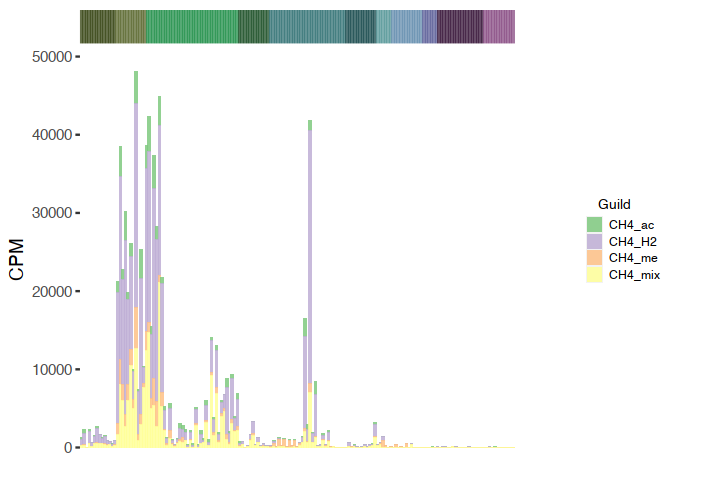

In [33]:
methanogen_cols_4 <- data.frame("Guild" = c("CH4_ac", "CH4_H2", "CH4_me", "CH4_mix"),
                              "Index" = c(1,2,3,4),
                              "color" = c("#7FC97F", "#BEAED4", "#FDC086", "#FFFF99"))
methanogen_subset_4 <- subset(OTU_guilds4, Guild == "CH4_ac" | Guild == "CH4_H2" | Guild == "CH4_mix" | Guild == "CH4_me")
methanogen_guilds_4 <- abund_loc_barplot(methanogen_subset_4, "Guild", metaDB, "EWsiteHyd_index", "", methanogen_cols_4)
options(repr.plot.width = 6, repr.plot.height = 4) 
methanogen_guilds_4

Using Guild as id variables



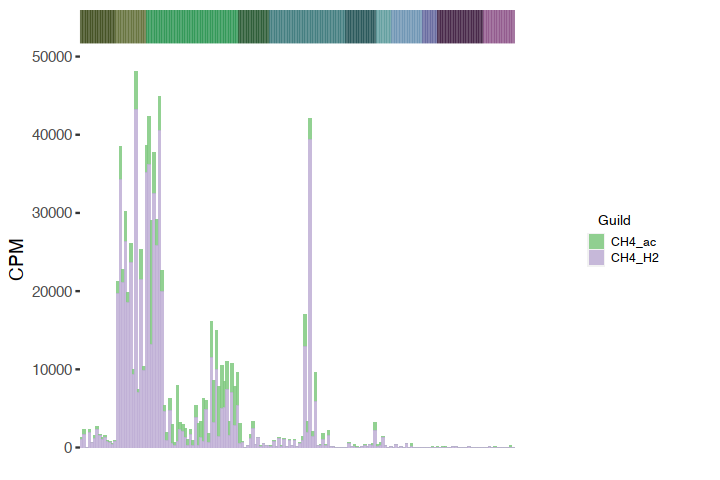

In [34]:
# Compare that to the two used in the paper
methanogen_cols_2 <- data.frame("Guild" = c("CH4_ac", "CH4_H2"),
                              "Index" = c(1,2),
                              "color" = c("#7FC97F", "#BEAED4"))
methanogen_subset_2 <- subset(OTU_guilds2, Guild == "CH4_ac" | Guild == "CH4_H2")
methanogen_guilds_2 <- abund_loc_barplot(methanogen_subset_2, "Guild", metaDB, "EWsiteHyd_index", "", methanogen_cols_2)
options(repr.plot.width = 6, repr.plot.height = 4) 
methanogen_guilds_2

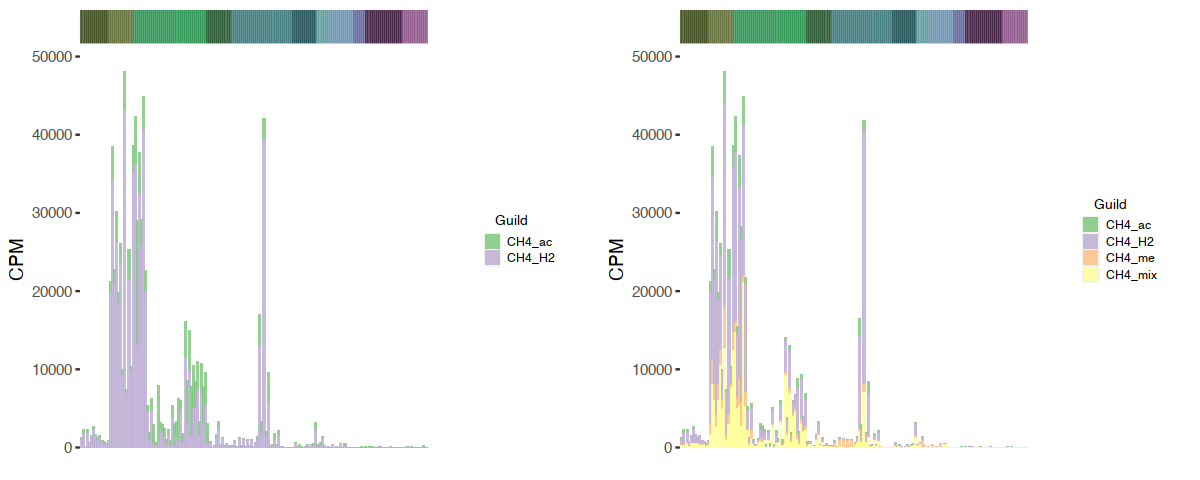

In [35]:
# Save multipanel
compare_methanogen_guilds <- plot_grid(methanogen_guilds_2, methanogen_guilds_4, align = "hv", axis = "trbl")
options(repr.plot.width = 10, repr.plot.height = 4) 
compare_methanogen_guilds
# pdf("../figs/GuildComparison_Methanogens2v4.pdf", width = 10, height = 4)
# compare_methanogen_guilds
# dev.off()

### sort by CH4

In [36]:
# metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...

In [37]:
min(metaDB['CH4_ug_m2_h'])

[1] -0.3413328

In [38]:
# Get log CH4 data, note n + 1 here is 0 = min + 5%
metaDB['CH4_logn1'] =  log10(metaDB['CH4_ug_m2_h'] - 1.05*min(metaDB['CH4_ug_m2_h']))

### plot it

Using Guild as id variables



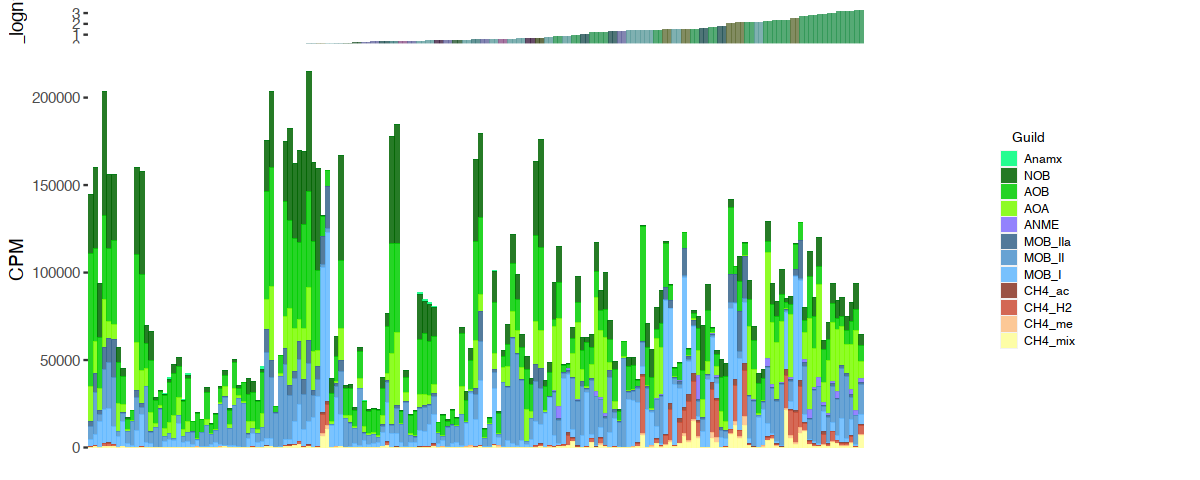

In [39]:
CH4_sort_G <- abund_loc_barplot(clean_guilds, "Guild", metaDB, "CH4_logn1", "graph", Guild_cols)
CH4_sort_G

Want to show as proportion, but not working!?  Similar works in tax comp. ipynb

In [40]:
# Want to show as proportion, but not working!?  Similar works in tax comp. ipynb
clean_guilds2 <- na.omit(clean_guilds)  # ah, some strange NAs, and row indexing in function
dim(clean_guilds2)

[1] 220 178

Using Guild as id variables



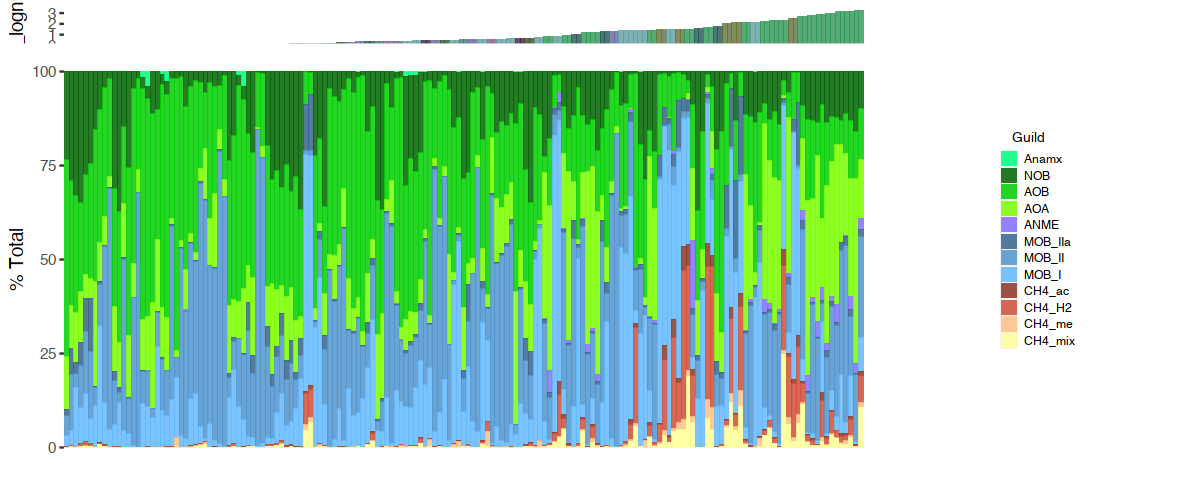

In [41]:
CH4_sort_G2 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "CH4_logn1", "graph", Guild_cols, relab = '% Total')
# CH4_sort_G2 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols, relab = '% Total')

CH4_sort_G2

Using Guild as id variables



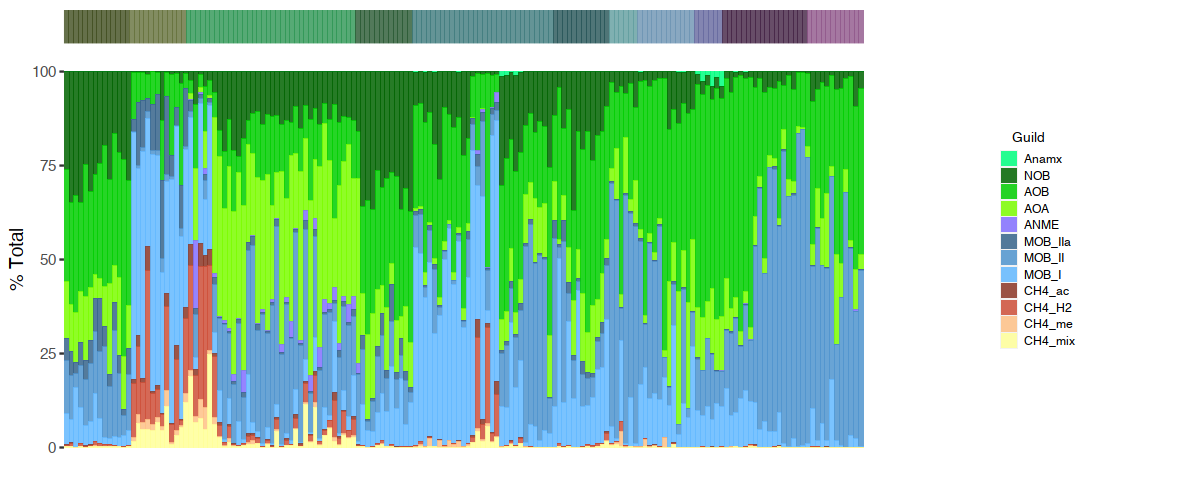

In [42]:
CH4_sort_G3 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols, relab = '% Total')
CH4_sort_G3

# 3) Plot tradeoffs (Figure 4b)
- Note 2 axis plot MUCH better in python, unless I am missing something in ggplot
- Note, Cliff remade some plots, but this won't be included anyways because result changed

In [43]:
# aggregate guilds
Guild_abund <- agg_by_cat(OTU_guilds, "Guild")
head(Guild_abund)

,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,⋯,Muzzi_CordB_D1,Muzzi_CordB_D2,Muzzi_CordC_D1,Muzzi_CordC_D2,Muzzi_PWA_D1,Muzzi_PWA_D2,Muzzi_PWB_D1,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CH4_mix,CH4_mix,238.57348,292.27524,0.000,465.4554,162.56386,505.46825,492.1567,477.95609,509.33952,⋯,0.000,34.481570,0.000,0.000,0.000000,0.00000,6.108325,0.0000,0.000,6.88056
CH4_H2,CH4_H2,784.98372,1429.77890,0.000,1489.4574,464.46818,819.47125,1749.8906,1064.53856,646.46940,⋯,0.000,13.792628,0.000,0.000,0.000000,0.00000,12.216650,0.0000,0.000,6.88056
CH4_ac,CH4_ac,207.78981,466.06052,0.000,248.2429,58.05852,107.22054,249.9844,79.65935,58.76995,⋯,0.000,6.896314,0.000,0.000,7.696748,0.00000,0.000000,0.0000,0.000,0.00000
CH4_me,CH4_me,38.47959,86.89264,0.000,108.6063,11.61170,53.61027,171.8643,79.65935,19.58998,⋯,0.000,13.792628,0.000,0.000,0.000000,0.00000,0.000000,0.0000,0.000,0.00000
MOB_I,MOB_I,13590.99270,11027.46597,15057.573,19207.7948,9405.48072,13241.73636,19686.2696,10515.03389,3487.01674,⋯,1423.154,882.728182,3047.100,1343.874,169.328459,40.08627,513.099303,843.7039,140.357,729.33940
MOB_II,MOB_II,22826.09532,20459.26710,3542.958,23117.6206,20378.54157,33468.12487,25967.1271,27721.45299,42500.46526,⋯,9254.921,23019.895866,9157.048,17312.702,11121.801039,21967.27357,7995.797472,11600.9281,16605.991,13251.95924


In [44]:
Guild_abundT <- data.frame(t(Guild_abund[,-1]))
Guild_abundT['Methanogen'] <- (Guild_abundT[,"CH4_H2"] + Guild_abundT[,"CH4_ac"] + Guild_abundT[,"CH4_me"] + Guild_abundT[,"CH4_mix"])
Guild_abundT['Methanotroph'] <- (Guild_abundT[,"MOB_I"] + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"] + Guild_abundT[,"ANME"])
Guild_abundT['Methanogen_Troph'] <- Guild_abundT['Methanogen']/Guild_abundT[,'Methanotroph']
Guild_abundT['AOA_NOB'] <- (Guild_abundT[,"AOA"])/(Guild_abundT[,"NOB"])
Guild_abundT['AOB_NOB'] <- (Guild_abundT[,"AOB"])/(Guild_abundT[,"NOB"])
Guild_abundT['AO_NOB'] <- (Guild_abundT[,"AOA"]+Guild_abundT[,"AOB"])/(Guild_abundT[,"NOB"])
head(Guild_abundT)

,CH4_mix,CH4_H2,CH4_ac,CH4_me,MOB_I,MOB_II,MOB_IIa,ANME,AOA,AOB,⋯,SRB_syn,SRB,FeOB,FeRB,Methanogen,Methanotroph,Methanogen_Troph,AOA_NOB,AOB_NOB,AO_NOB
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sandmound_TuleA_D1,238.5735,784.9837,207.78981,38.47959,13590.993,22826.095,9681.466,0,24742.38,49023.00,⋯,12929.144,54494.80,2732.051,5063.915,1269.8266,46098.55,0.02754591,0.5819005,1.1529412,1.734842
Sandmound_TuleA_D2,292.2752,1429.7789,466.06052,86.89264,11027.466,20459.267,11367.137,0,21944.34,47522.37,⋯,25025.080,83851.40,5031.874,4597.411,2275.0073,42853.87,0.05308756,0.3564280,0.7718758,1.128304
Sandmound_TuleB_D1,0.0000,0.0000,0.00000,0.00000,15057.573,3542.958,2657.219,0,12400.35,29229.41,⋯,1771.479,175376.44,5314.438,9743.136,0.0000,21257.75,0.00000000,0.4000000,0.9428571,1.342857
Sandmound_TuleB_D2,465.4554,1489.4574,248.24291,108.60627,19207.795,23117.621,12427.660,0,27663.57,47926.40,⋯,31976.789,114610.65,7711.045,7928.258,2311.7621,54753.08,0.04222159,0.3893013,0.6744541,1.063755
Sandmound_TuleC_D1,162.5639,464.4682,58.05852,11.61170,9405.481,20378.542,8464.933,0,29075.71,59277.75,⋯,10253.135,49419.41,1881.096,4725.964,696.7023,38248.95,0.01821494,0.6940133,1.4149113,2.108925
Sandmound_TuleC_D2,505.4682,819.4712,107.22054,53.61027,13241.736,33468.125,13073.247,0,30358.73,54950.53,⋯,19613.700,82567.47,4939.803,7206.752,1485.7703,59783.11,0.02485268,0.4444943,0.8045526,1.249047


In [45]:
# Write table for LASSO 
# write.table(Guild_abundT, "Silva_OTU_Guild_abundT_counts.txt", row.names=T, col.names=T, sep='\t')

In [46]:
# Add sample, merge with site class RESTORED or NOT
Guild_abundT["Sample"] <- row.names(Guild_abundT)                      #head(Guild_abundT)

# Get sample names & Restoration & relevel 
restor <- c("Sample", "EWcoastGroup", "Location")
Samp_restor <- metaDB[restor]
levels(Samp_restor$EWcoastGroup) <- c("Historic", "Restored")
colnames(Samp_restor) <- c("Sample", "restor", "Location")

# Merge with Guilds
Guild_abundT_rest <- merge(Guild_abundT, Samp_restor)

head(Guild_abundT_rest)

,Sample,CH4_mix,CH4_H2,CH4_ac,CH4_me,MOB_I,MOB_II,MOB_IIa,ANME,AOA,⋯,FeOB,FeRB,Methanogen,Methanotroph,Methanogen_Troph,AOA_NOB,AOB_NOB,AO_NOB,restor,Location
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Browns_ThreeSqA_D1,227.8226,164.97502,15.711906,31.42381,15444.804,14211.419,3385.916,0.000000,27810.074,⋯,3810.137,16638.91,439.9334,33042.14,0.013314313,0.5937605,1.2022811,1.7960416,SF_Ref,Browns
2,Browns_ThreeSqA_D2,598.8107,668.43989,20.888747,41.77749,37098.414,21891.406,17664.917,0.000000,9692.378,⋯,13229.539,12881.39,1329.9169,76654.74,0.017349441,0.2010979,0.9034961,1.1045940,SF_Ref,Browns
3,Browns_ThreeSqB_D1,113.6872,99.47633,14.210904,0.00000,16690.707,12633.494,3105.083,7.105452,22311.119,⋯,6650.703,17557.57,227.3745,32436.39,0.007009858,0.4913928,1.3771518,1.8685446,SF_Ref,Browns
4,Browns_ThreeSqB_D2,188.8943,346.30617,0.000000,12.59295,28825.266,9520.272,7398.359,18.889428,9255.820,⋯,14928.944,14211.15,547.7934,45762.79,0.011970281,0.1581155,0.7776702,0.9357857,SF_Ref,Browns
5,Browns_ThreeSqC_D1,141.8948,94.59651,6.756894,20.27068,9452.894,18912.546,3696.021,6.756894,27737.049,⋯,6547.430,24946.45,263.5189,32068.22,0.008217446,0.5557060,1.0050088,1.5607148,SF_Ref,Browns
6,Browns_ThreeSqC_D2,65.8299,197.48969,7.314433,29.25773,18403.113,4235.057,2267.474,0.000000,18659.118,⋯,15828.433,17510.75,299.8917,24905.64,0.012041116,0.3192341,0.9445626,1.2637968,SF_Ref,Browns


In [48]:
max(Guild_abundT_rest$AO_NOB)
min(Guild_abundT_rest$AO_NOB)
max(Guild_abundT_rest$Methanotroph)
min(Guild_abundT_rest$Methanotroph)
max(Guild_abundT_rest$Methanogen_Troph)
min(Guild_abundT_rest$Methanogen_Troph)
max(Guild_abundT_rest$Methanotroph)/max(Guild_abundT_rest$Methanogen_Troph)

[1] 118.875

[1] 0.9357857

[1] 122940.7

[1] 3206.189

[1] 2.195705

[1] 0

[1] 55991.44

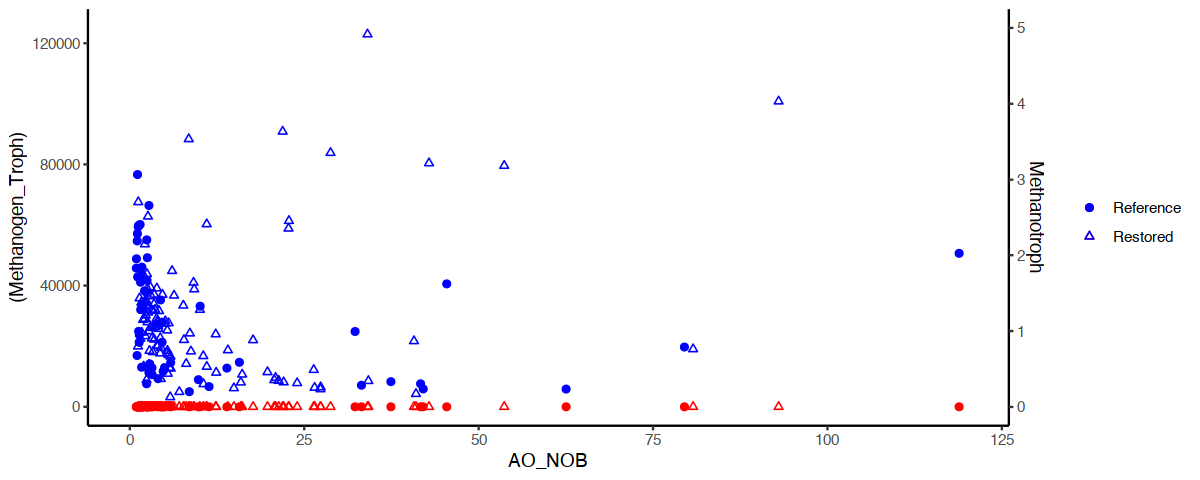

In [49]:
# Wyatt Two Axis Plot
# p <- ggplot(Guild_abundT_rest, aes(x=AOA_NOB))  
# p + ggplot(Guild_abundT_rest, aes(x=log10(AOA_NOB), y=(Methanotroph)))# + 
# coord_trans(x="log") +
# scale_y_continuous(limits = c(0, 60000)) +
# p <- p + scale_x_continuous(limits = c(0, 6), trans='log10') #+ scale_y_continuous(limits = c(0, 6000)) +

p <- ggplot(Guild_abundT_rest, aes(x = AO_NOB))  +
    geom_point(aes(y = (Methanogen_Troph), shape = restor), color = "red") + 
    geom_point(aes(y = (Methanotroph), shape = restor), color = "blue") +
    scale_shape_manual(values = c(19, 2),
                       labels = c("Reference", "Restored")) +
    scale_y_continuous(sec.axis = sec_axis(~./25000, name = "Methanotroph"), limits = c(0, 125000)) + 
    scale_x_continuous(limits = c(0, 120)) + 
    theme_bw() + 
    theme(panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.title = element_blank())
p

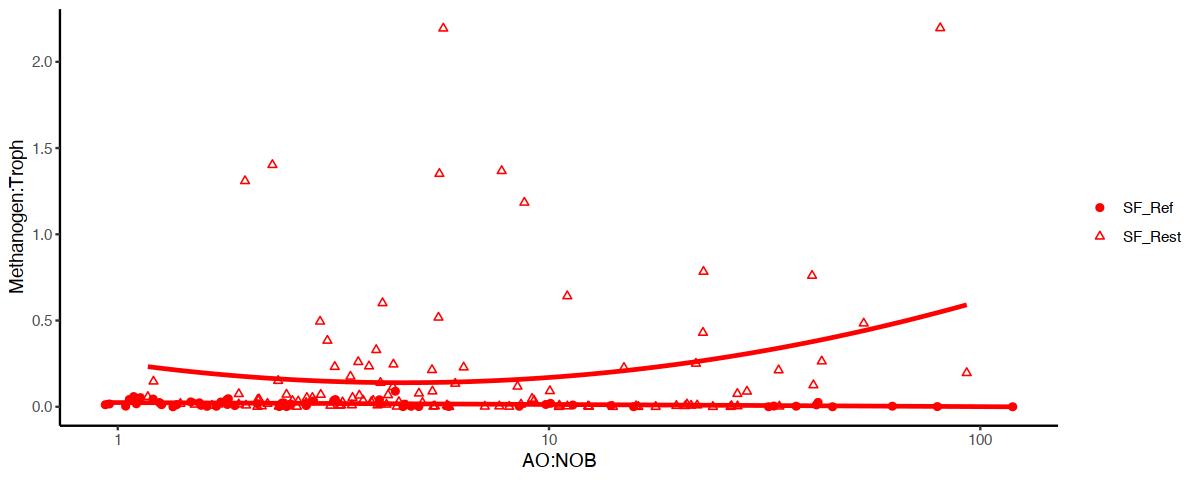

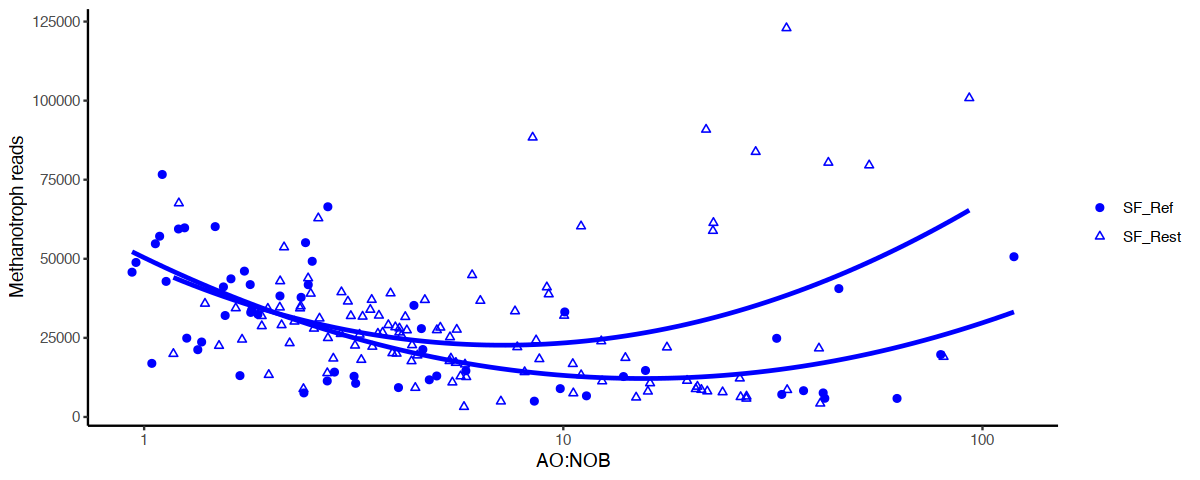

In [50]:
# Plot each separately, untransformed to ensure accuracy in the two plot graph
# Trends are much different with new guilds though
ggplot(Guild_abundT_rest, aes(x = AO_NOB)) +
    geom_point(aes(y=(Methanogen_Troph),shape = restor), color = "red") + 
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AO:NOB",
         y = "Methanogen:Troph") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

ggplot(Guild_abundT_rest, aes(x = AO_NOB)) +
    geom_point(aes(y=(Methanotroph), shape = restor), color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AO:NOB",
         y = "Methanotroph reads") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))


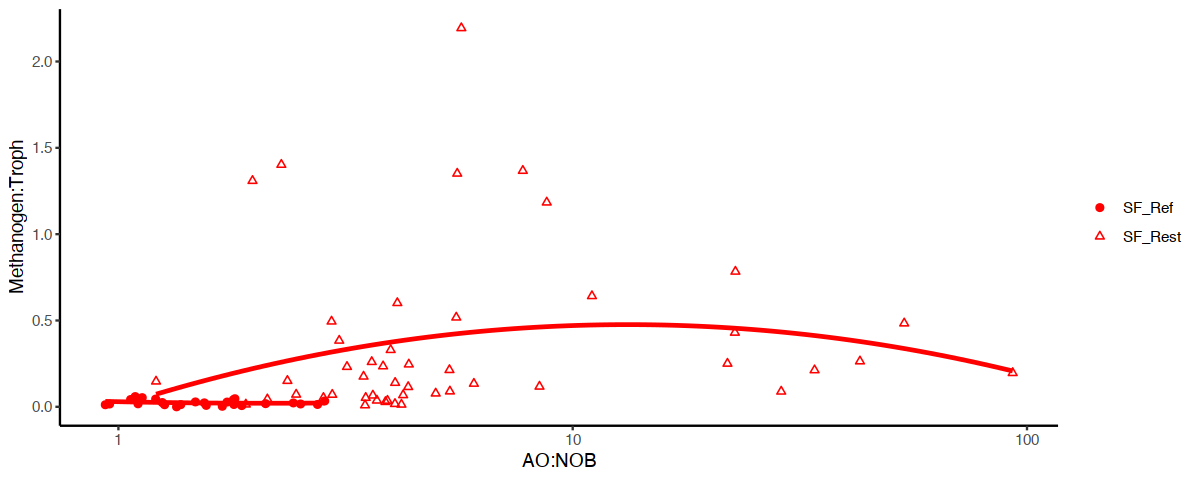

`geom_smooth()` using formula 'y ~ x'



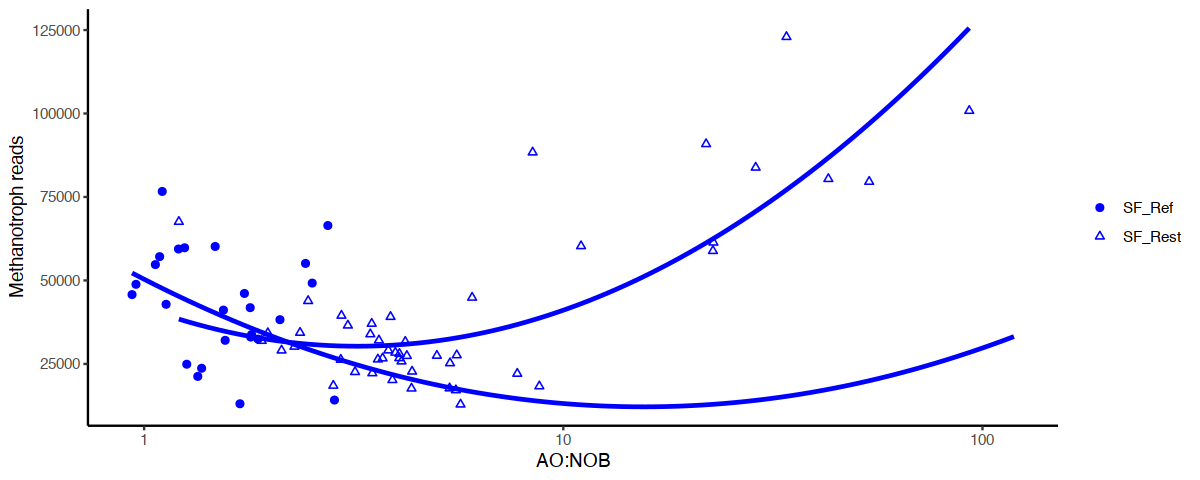

`geom_smooth()` using formula 'y ~ x'



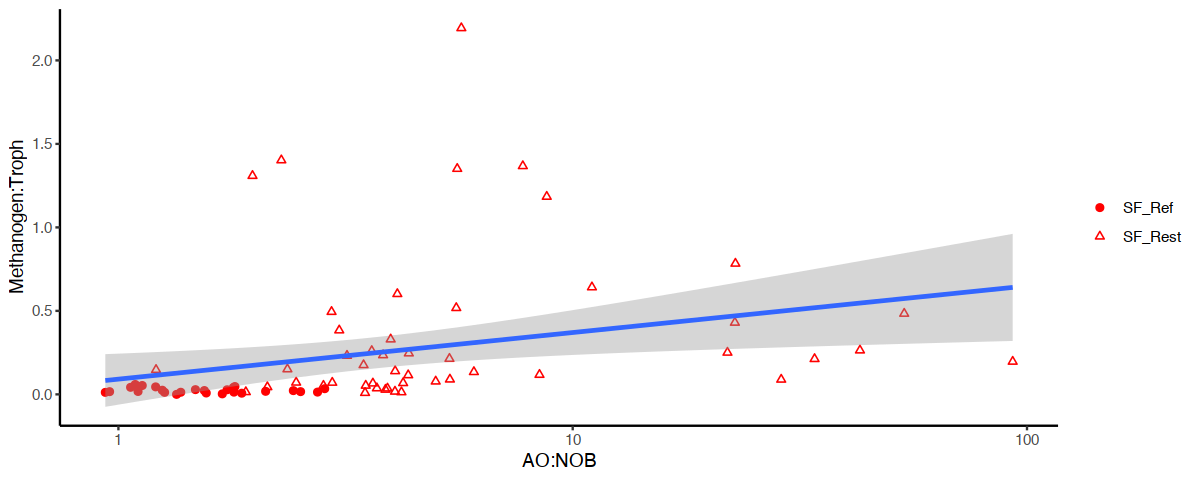

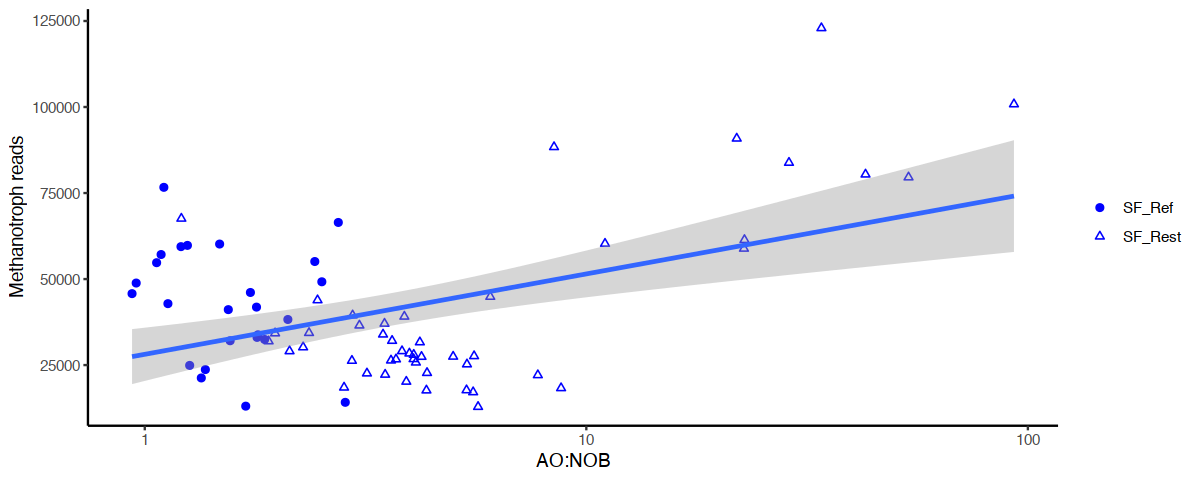

In [51]:
# Delta only
Guild_abundT_rest_D <- Guild_abundT_rest %>%
    filter(Sample %in% Delta_sites) 

# Plot each separately, untransformed to ensure accuracy in the two plot graph
# Trends are much different with new guilds though
ggplot(Guild_abundT_rest_D, aes(x = AO_NOB)) +
    geom_point(aes(y=(Methanogen_Troph),shape = restor), color = "red") + 
    stat_smooth(data = subset(Guild_abundT_rest_D, restor == "SF_Ref"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest_D, restor == "SF_Rest"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AO:NOB",
         y = "Methanogen:Troph") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

ggplot(Guild_abundT_rest_D, aes(x = AO_NOB)) +
    geom_point(aes(y=(Methanotroph), shape = restor), color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest_D, restor == "SF_Rest"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AO:NOB",
         y = "Methanotroph reads") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

# And not split ref and rest and linear
ggplot(Guild_abundT_rest_D, aes(x = AO_NOB)) +
    geom_point(aes(y=(Methanogen_Troph),shape = restor), color = "red") + 
    geom_smooth(aes(y=(Methanogen_Troph)), method = "lm") +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AO:NOB",
         y = "Methanogen:Troph") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

ggplot(Guild_abundT_rest_D, aes(x = AO_NOB)) +
    geom_point(aes(y=(Methanotroph), shape = restor), color = "blue") +
    geom_smooth(aes(y=(Methanotroph)), method = "lm") +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AO:NOB",
         y = "Methanotroph reads") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

In [52]:
# Delta, Linear
print('Delta AO:NOB Methanogen:Troph Linear')
m1 <- lm(log(AO_NOB) ~ Methanogen_Troph, data = Guild_abundT_rest_D)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Delta AO:NOB Methanotroph Linear')
m1 <- lm(log(AO_NOB) ~ Methanotroph, data = Guild_abundT_rest_D)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

[1] "Delta AO:NOB Methanogen:Troph Linear"


[1] 0.08

[1] 0.01253727

[1] "Delta AO:NOB Methanotroph Linear"


[1] 0.2

[1] 6.739265e-05

In [54]:
# All, Linear
print('All AO:NOB Methanogen:Troph Linear')
m1 <- lm(log(AO_NOB) ~ Methanogen_Troph, data = Guild_abundT_rest)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('All AO:NOB Methanotroph Linear')
m1 <- lm(log(AO_NOB) ~ Methanotroph, data = Guild_abundT_rest)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

[1] "All AO:NOB Methanogen:Troph Linear"


[1] 0.02

[1] 0.0665962

[1] "All AO:NOB Methanotroph Linear"


[1] 0.01

[1] 0.17464

In [55]:
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep = '\t', header = T, row.names = 1) %>%
    set_names(c('color','Location'))
site_colors

,color,Location
,<chr>,<chr>
Sandmound,#3f4c1d,Sandmound
WestPond,#63703a,WestPond
Mayberry,#2c9553,Mayberry
Browns,#275831,Browns
RushRanch,#3e797c,RushRanch
Joice,#235355,Joice
Goodyear,#5f9c9e,Goodyear
WhiteSlough,#6c92b2,WhiteSlough
Tolay,#64679d,Tolay


In [56]:
Guild_abundT_rest$Location <- factor(Guild_abundT_rest$Location,
                                       levels = site_colors$Location)
Guild_abundT_rest_D$Location <- factor(Guild_abundT_rest_D$Location,
                                       levels = c("Sandmound", "WestPond", "Mayberry", "Browns"))

In [59]:
# Make supplemental figure of (a) All and (b) Delta MG:MT vs log AO:NOB ratios
a <- ggplot(Guild_abundT_rest, aes(x = AO_NOB)) +
    geom_point(aes(y=(Methanogen_Troph), shape = restor, color = Location), size = 3, alpha = 0.75) + 
    geom_smooth(aes(y=(Methanogen_Troph)), method = "lm", alpha = 0.1, size = 0.2) +
    geom_text(aes(x = 2, y = Inf, hjust = 1, vjust = 2, label = "R^2 == 0.02"), 
              parse = TRUE, size = 2, color = "black", check_overlap = T) +
    geom_text(aes(x = 2, y = Inf, hjust = 1, vjust = 5, label = "p = 0.07"), 
              size = 2, color = "black", check_overlap = T) +
    scale_shape_manual(values = c(16, 17),
                      labels = c("Reference", "Restored")) +
    scale_color_manual(values = site_colors$color) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AO:NOB",
         y = "Methanogen:Troph") +
    guides(shape = guide_legend(order = 1),
           colour = guide_legend(override.aes = list(alpha = 1, 
                                                     shape = c(16, 17, 17, 16, 17, 16, 17, 17, 17, 16, 17)))) +
    theme_bw() +
    theme(legend.title = element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"),
          plot.margin = margin(20, 5, 5, 5))

b <- ggplot(Guild_abundT_rest_D, aes(x = AO_NOB)) +
    geom_point(aes(y=(Methanogen_Troph), shape = restor, color = Location), size = 3, alpha = 0.75) + 
    geom_smooth(aes(y=(Methanogen_Troph)), method = "lm", alpha = 0.1, size = 0.2) +
    geom_text(aes(x = max(AO_NOB), y = Inf, hjust = 1, vjust = 2, label = "R^2 == 0.08"), 
              parse = TRUE, size = 2, color = "black", check_overlap = T) +
    geom_text(aes(x = max(AO_NOB), y = Inf, hjust = 1, vjust = 5, label = "p = 0.01"), 
              size = 2, color = "black", check_overlap = T) +
    scale_shape_manual(values = c(16, 17),
                      labels = c("Reference", "Restored")) +
    scale_color_manual(values = c("#3f4c1d", "#63703a", "#2c9553", "#275831")) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AO:NOB",
         y = "Methanogen:Troph") +
    guides(colour = guide_legend(override.aes = list(alpha = 1, shape = c(16, 17, 17, 16)))) +
    theme_bw() +
    theme(legend.title = element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"),
          plot.margin = margin(20, 5, 5, 5))

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



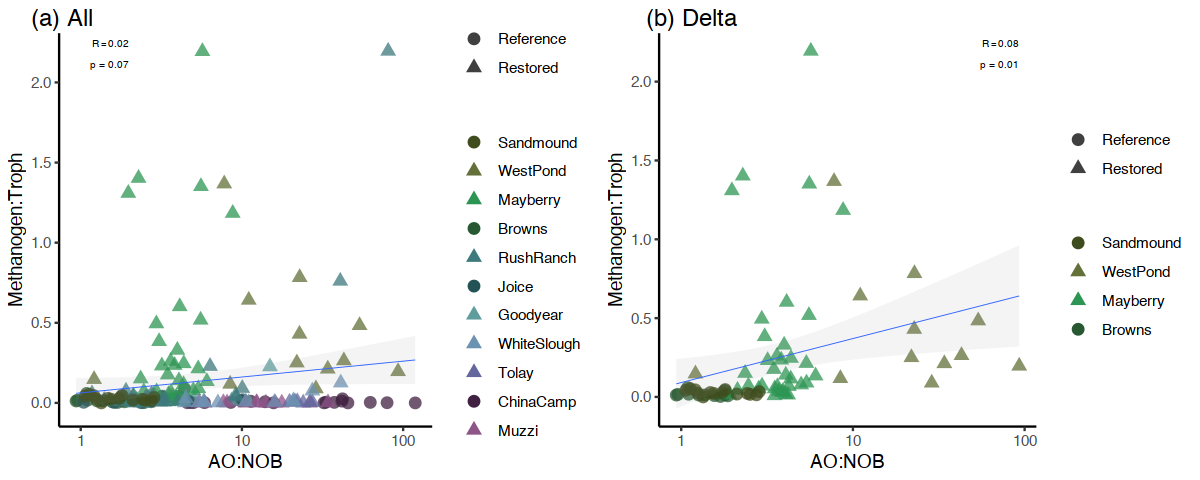

In [61]:
#pdf("../figs/FigureS12.pdf", width = 10, height = 4)
plot_grid(a, b, labels = c("(a) All", "(b) Delta"), vjust = 1.5)
#dev.off()

## Figure 4b (probably don't use anymore though)

### Check stats - 4 linear regression, 4 polynomial regression

In [62]:
# Make data frame and log AO:NOB
Guild_abundT_rest$logAO_NOB <- log10(Guild_abundT_rest$AO_NOB)
Guild_abundT_rest$logAOA_NOB <- log10(Guild_abundT_rest$AOA_NOB + 1)
Guild_abundT_rest$logAOB_NOB <- log10(Guild_abundT_rest$AOB_NOB)
restored <- subset(Guild_abundT_rest, restor == "SF_Rest")
reference <- subset(Guild_abundT_rest, restor == "SF_Ref")

In [63]:
# Linear
print('Restored AO:NOB Methanotroph Linear')
m1 <- lm(logAO_NOB ~ Methanotroph, data = restored)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AO:NOB Methanotroph Linear')
m1 <- lm(logAO_NOB ~ Methanotroph, data = reference)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Restored AO:NOB Methanogen:Troph Linear')
m1 <- lm(logAO_NOB ~ Methanogen_Troph, data = restored)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AO:NOB Methanogen:Troph Linear')
m1 <- lm(logAO_NOB ~ Methanogen_Troph, data = reference)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

# Polynomial
print('Restored AO:NOB Methanotroph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanotroph, 2), data = restored)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AO:NOB Methanotroph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanotroph, 2), data = reference)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Restored AO:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanogen_Troph, 2), data = restored)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AO:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanogen_Troph, 2), data = reference)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

[1] "Restored AO:NOB Methanotroph Linear"


[1] 0.01

[1] 0.26183

[1] "Reference AO:NOB Methanotroph Linear"


[1] 0.23

[1] 0.0002404638

[1] "Restored AO:NOB Methanogen:Troph Linear"


[1] 0.02

[1] 0.1054265

[1] "Reference AO:NOB Methanogen:Troph Linear"


[1] 0.13

[1] 0.006703679

[1] "Restored AO:NOB Methanotroph Polynomial"


[1] 0.32

[1] 0.1770364

[1] "Reference AO:NOB Methanotroph Polynomial"


[1] 0.25

[1] 0.0002335292

[1] "Restored AO:NOB Methanogen:Troph Polynomial"


[1] 0.02

[1] 0.1069881

[1] "Reference AO:NOB Methanogen:Troph Polynomial"


[1] 0.21

[1] 0.00498369

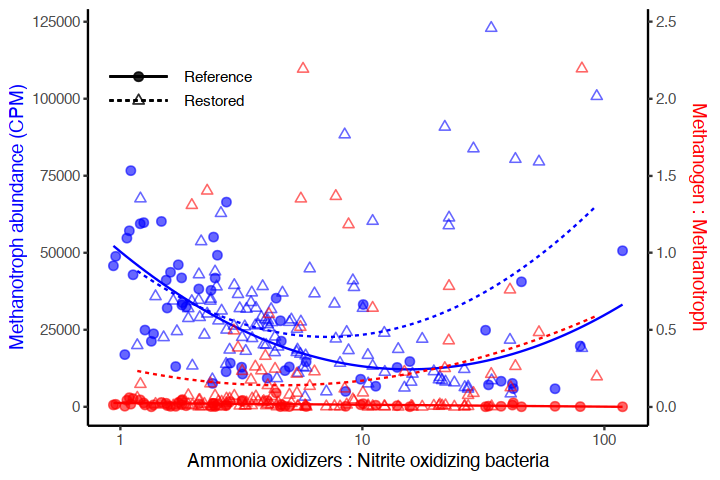

In [64]:
# Cliff updated two axis plot
# Note that only reference lines are significant and this works out as they are solid versus dashed!
options(repr.plot.width = 6, repr.plot.height = 4)
p1 <- ggplot(Guild_abundT_rest, aes(AO_NOB, Methanotroph))  +
    geom_point(aes(AO_NOB, Methanotroph, shape = restor), size = 2, alpha = 0.6, color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "blue", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanotroph, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "blue", se = F) +
    geom_point(aes(AO_NOB, Methanogen_Troph*50000, shape = restor), size = 2, alpha = 0.6, color = "red") + 
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanogen_Troph*50000, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "red", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanogen_Troph*50000, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2),
                       labels = c("Reference", "Restored"),
                       guide = guide_legend(override.aes = list(size = 3, alpha = 1, color = "black"))) +
    scale_linetype_manual(values = c(1, 2),
                          labels = c("Reference", "Restored"),
                          guide = guide_legend(override.aes = list(size = 1, alpha = 1, color = "black"))) +
    scale_y_continuous(sec.axis = sec_axis(~./50000, name = "Methanogen : Methanotroph")) +  
    scale_x_continuous(trans = 'log10') +
    labs(x = "Ammonia oxidizers : Nitrite oxidizing bacteria",
         y = "Methanotroph abundance (CPM)") +
    guides(shape = guide_legend(override.aes = list(color = "black"),
                                keywidth = 3, keyheight = 1),
           linetype = guide_legend(keywidth = 3, keyheight = 1)) +
    theme_bw() + 
    theme(legend.position = c(0.16, 0.82),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.title = element_blank(),
          axis.title.y.left = element_text(color = "blue"),
          axis.title.y.right = element_text(color = "red", margin = margin(t = 0, r = 0, b = 0, l = 10)))
p1

# pdf("../figs/Figure4b_split.pdf", width = 6, height = 4)
# p1
# dev.off()

[1] "AO:NOB Methanotroph Polynomial"


[1] 0.28

[1] 0.1138099

[1] "AO:NOB Methanogen:Troph Polynomial"


[1] 0.02

[1] 0.06737548

[1] "Note neither of these curves is significant"


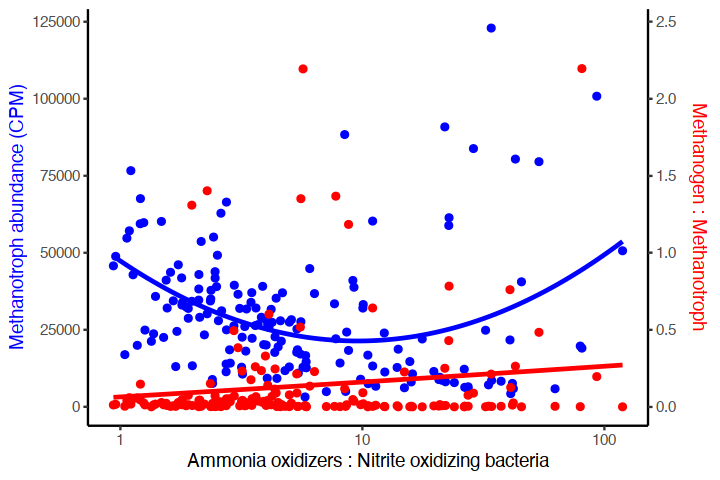

In [65]:
# Cliff updated two axis plot - one line each, don't distinguish ref vs restored
print('AO:NOB Methanotroph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanotroph, 2), data = Guild_abundT_rest)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('AO:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanogen_Troph, 2), data = Guild_abundT_rest)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Note neither of these curves is significant')

p2 <- ggplot(Guild_abundT_rest, aes(AO_NOB, Methanotroph))  +
    geom_point(aes(AO_NOB, Methanotroph), color = "blue") +
    stat_smooth(aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    geom_point(aes(AO_NOB, Methanogen_Troph*50000), color = "red") + 
    stat_smooth(aes(y = Methanogen_Troph*50000), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2),
                       labels = c("Reference", "Restored")) +
    scale_y_continuous(sec.axis = sec_axis(~./50000, name = "Methanogen : Methanotroph")) +  
    scale_x_continuous(trans = 'log10') +
    labs(x = "Ammonia oxidizers : Nitrite oxidizing bacteria",
         y = "Methanotroph abundance (CPM)") +
    theme_bw() + 
    theme(panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.title = element_blank(),
          axis.title.y.left = element_text(color = "blue"),
          axis.title.y.right = element_text(color = "red", margin = margin(t = 0, r = 0, b = 0, l = 10)))
p2

# pdf("../figs/Figure4b_lumped.pdf", width = 6, height = 4)
# p2
# dev.off()

NULL

ERROR: Error in value[[3L]](cond): invalid graphics state


plot without title

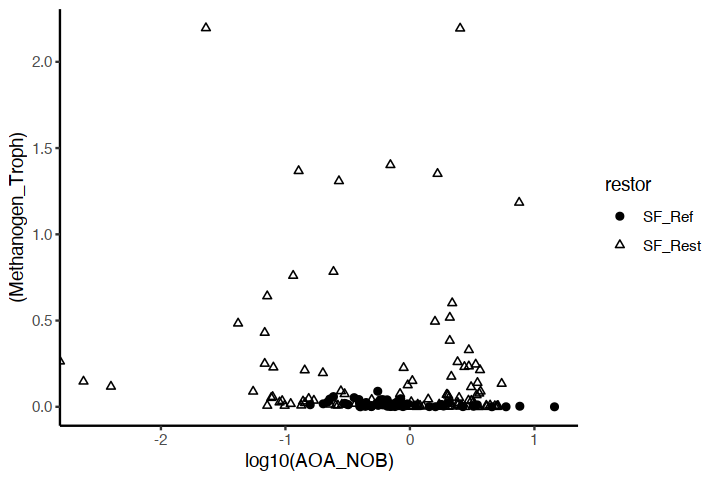

In [66]:
plot(Guild_abundT_rest, aes(x=log10(AOA_NOB), y=(Methanotroph), shape=restor)) + 
        geom_point(color="gray60") + scale_shape_manual(values=c(19, 2))  +
        #scale_x_continuous(limits = c(-2, 1)) +
        theme(legend.title=element_blank())       + 
        theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"), 
                legend.title=element_blank())

#ggplot(Guild_abundT, aes(x=AOA_NOB, y=Methanogen_Troph)) + geom_point()
ggplot(Guild_abundT_rest, aes(x=log10(AOA_NOB), y=(Methanogen_Troph), shape=restor)) + 
        geom_point() + scale_shape_manual(values=c(19, 2)) +
        #scale_x_continuous(limits = c(-2, 1)) +
        theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))

## Check doing AOA and AOB separately
--plot separate panels

### AOA

[1] "Restored AOA:NOB Methanogen:Troph Polynomial"


[1] 0.02

[1] 0.2643475

[1] "Reference AOA:NOB Methanogen:Troph Polynomial"


[1] 0.2

[1] 0.004680628

[1] "Restored AOA:NOB Methanotroph Polynomial"


[1] 0.18

[1] 3.778879e-06

[1] "Reference AOA:NOB Methanotroph Polynomial"


[1] 0.08

[1] 0.03609003

[1] "Methanotroph relationships are significant"


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


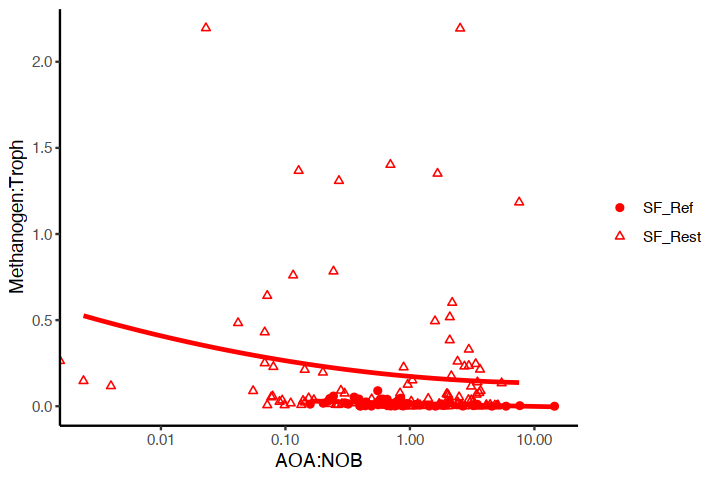

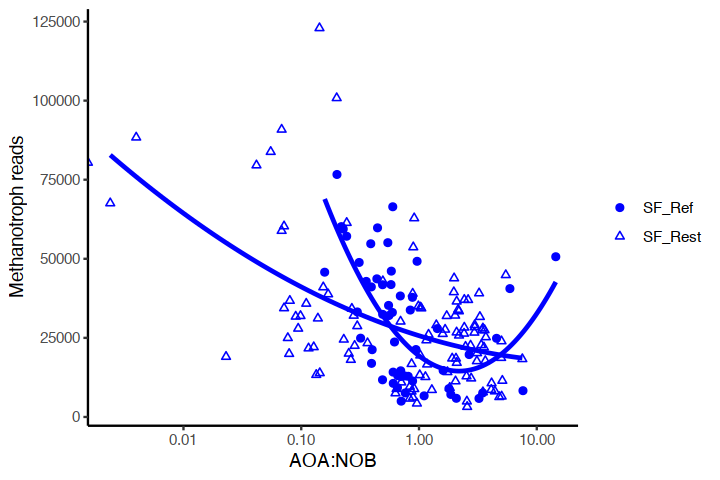

In [67]:
print('Restored AOA:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAOA_NOB ~ poly(Methanogen_Troph, 2), data = restored, na.action = na.exclude)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AOA:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAOA_NOB ~ poly(Methanogen_Troph, 2), data = reference, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Restored AOA:NOB Methanotroph Polynomial')
m1 <- lm(logAOA_NOB ~ poly(Methanotroph, 2), data = restored, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AOA:NOB Methanotroph Polynomial')
m1 <- lm(logAOA_NOB ~ poly(Methanotroph, 2), data = reference, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Methanotroph relationships are significant')

ggplot(Guild_abundT_rest, aes(x = AOA_NOB)) +
    geom_point(aes(y=(Methanogen_Troph),shape = restor), color = "red") + 
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_linetype_manual(values = c(1, 2),
                          labels = c("Reference", "Restored"),
                          guide = guide_legend(override.aes = list(size = 1, alpha = 1, color = "black"))) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOA:NOB",
         y = "Methanogen:Troph") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

ggplot(Guild_abundT_rest, aes(x = AOA_NOB)) +
    geom_point(aes(y=(Methanotroph), shape = restor), color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_linetype_manual(values = c(1, 2),
                          labels = c("Reference", "Restored"),
                          guide = guide_legend(override.aes = list(size = 1, alpha = 1, color = "black"))) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOA:NOB",
         y = "Methanotroph reads") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


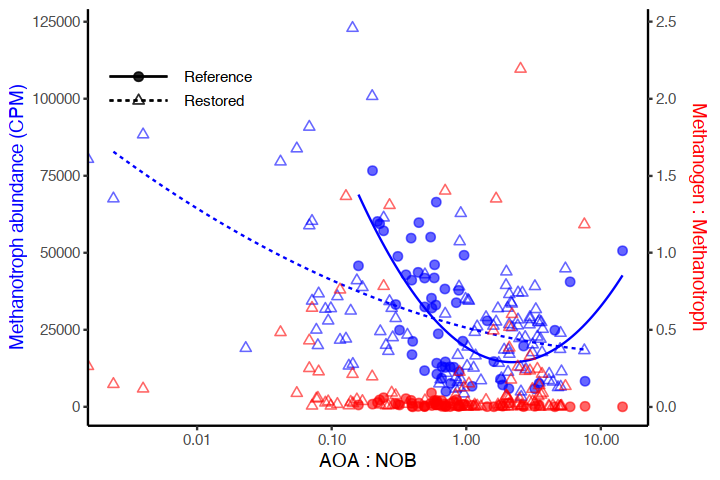

In [68]:
# Combined, with only significant lines (methanotroph)
options(repr.plot.width = 6, repr.plot.height = 4)
p3 <- ggplot(Guild_abundT_rest, aes(AOA_NOB, Methanotroph))  +
    geom_point(aes(AOA_NOB, Methanotroph, shape = restor), size = 2, alpha = 0.6, color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "blue", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanotroph, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "blue", se = F) +
    geom_point(aes(AOA_NOB, Methanogen_Troph*50000, shape = restor), size = 2, alpha = 0.6, color = "red") + 
    scale_shape_manual(values = c(19, 2),
                       labels = c("Reference", "Restored"),
                       guide = guide_legend(override.aes = list(size = 3, alpha = 1, color = "black"))) +
    scale_linetype_manual(values = c(1, 2),
                          labels = c("Reference", "Restored"),
                          guide = guide_legend(override.aes = list(size = 1, alpha = 1, color = "black"))) +
    scale_y_continuous(sec.axis = sec_axis(~./50000, name = "Methanogen : Methanotroph")) +  
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOA : NOB",
         y = "Methanotroph abundance (CPM)") +
    guides(shape = guide_legend(override.aes = list(color = "black"),
                                keywidth = 3, keyheight = 1),
           linetype = guide_legend(keywidth = 3, keyheight = 1)) +
    theme_bw() + 
    theme(legend.position = c(0.16, 0.82),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.title = element_blank(),
          axis.title.y.left = element_text(color = "blue"),
          axis.title.y.right = element_text(color = "red", margin = margin(t = 0, r = 0, b = 0, l = 10)))
p3

### AOB

[1] "Restored AOA:NOB Methanogen:Troph Polynomial"


[1] 0.02

[1] 0.193904

[1] "Reference AOA:NOB Methanogen:Troph Polynomial"


[1] 0.2

[1] 0.006723019

[1] "Restored AOA:NOB Methanotroph Polynomial"


[1] 0.33

[1] 0.1613318

[1] "Reference AOA:NOB Methanotroph Polynomial"


[1] 0.25

[1] 0.0002666968

[1] "Reference relationships are significant"


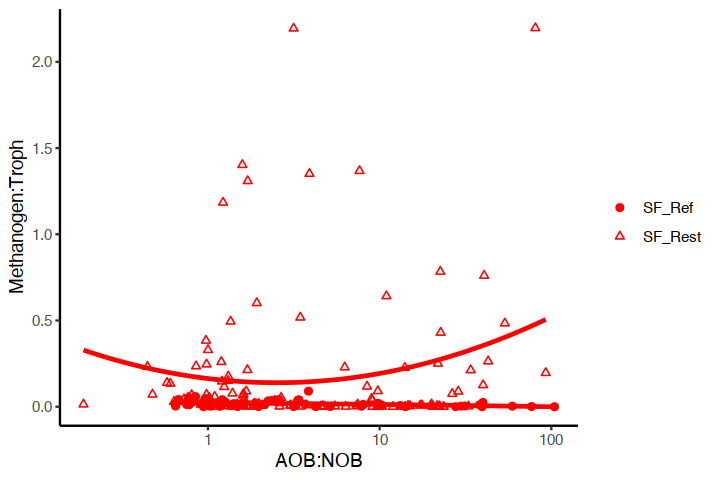

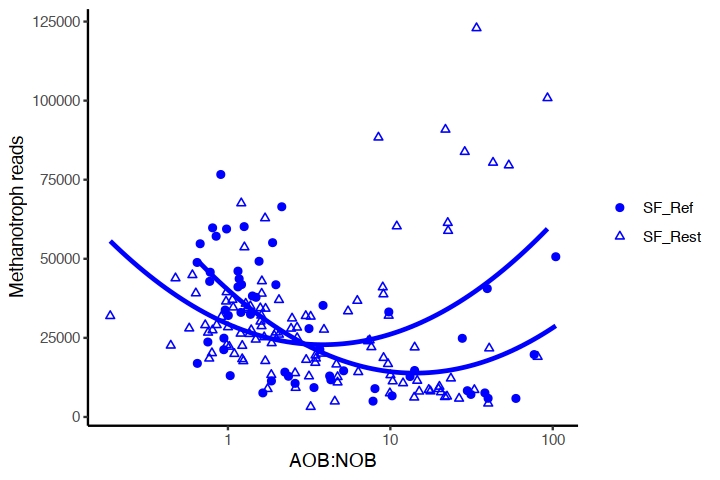

In [69]:
print('Restored AOA:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAOB_NOB ~ poly(Methanogen_Troph, 2), data = restored, na.action = na.exclude)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AOA:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAOB_NOB ~ poly(Methanogen_Troph, 2), data = reference, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Restored AOA:NOB Methanotroph Polynomial')
m1 <- lm(logAOB_NOB ~ poly(Methanotroph, 2), data = restored, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AOA:NOB Methanotroph Polynomial')
m1 <- lm(logAOB_NOB ~ poly(Methanotroph, 2), data = reference, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference relationships are significant')

ggplot(Guild_abundT_rest, aes(x = AOB_NOB)) +
    geom_point(aes(y=(Methanogen_Troph),shape = restor), color = "red") + 
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOB:NOB",
         y = "Methanogen:Troph") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

ggplot(Guild_abundT_rest, aes(x = AOB_NOB)) +
    geom_point(aes(y=(Methanotroph), shape = restor), color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOB:NOB",
         y = "Methanotroph reads") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

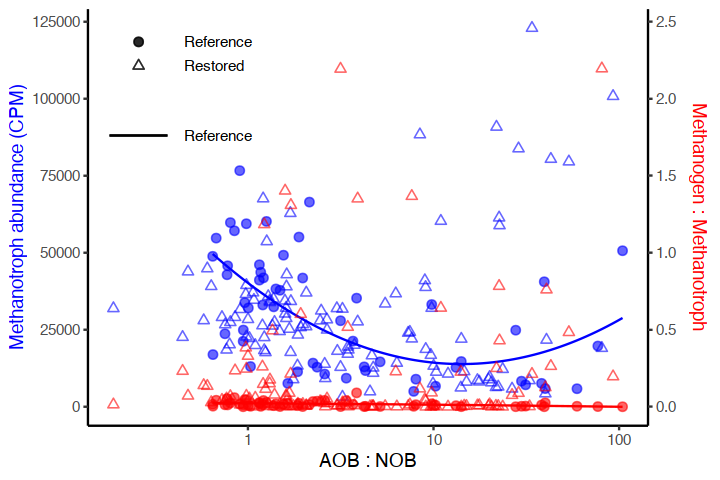

In [70]:
# Combined, with only significant lines (reference)
options(repr.plot.width = 6, repr.plot.height = 4)
p4 <- ggplot(Guild_abundT_rest, aes(AOB_NOB, Methanotroph))  +
    geom_point(aes(AOB_NOB, Methanotroph, shape = restor), size = 2, alpha = 0.6, color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "blue", se = F) +
    geom_point(aes(AOB_NOB, Methanogen_Troph*50000, shape = restor), size = 2, alpha = 0.6, color = "red") + 
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanogen_Troph*50000, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2),
                       labels = c("Reference", "Restored"),
                       guide = guide_legend(override.aes = list(size = 3, alpha = 1, color = "black"))) +
    scale_linetype_manual(values = c(1, 2),
                          labels = c("Reference", "Restored"),
                          guide = guide_legend(override.aes = list(size = 1, alpha = 1, color = "black"))) +
    scale_y_continuous(sec.axis = sec_axis(~./50000, name = "Methanogen : Methanotroph")) +  
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOB : NOB",
         y = "Methanotroph abundance (CPM)") +
    guides(shape = guide_legend(override.aes = list(color = "black"),
                                keywidth = 3, keyheight = 1),
           linetype = guide_legend(override.aes = list(color = "black"),
                                   keywidth = 3, keyheight = 1)) +
    theme_bw() + 
    theme(legend.position = c(0.16, 0.82),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.title = element_blank(),
          axis.title.y.left = element_text(color = "blue"),
          axis.title.y.right = element_text(color = "red", margin = margin(t = 0, r = 0, b = 0, l = 10)))
p4

## 4) Delta methanotrophs, methanogens

In [71]:
# Read pre-calculated CORRELATION table (Here, OTU level)
CH4corrRanksOTU_Delta <- read.table("../taxon_analysis/correlations/CH4corrRanks_Silva_Delta_OTU.txt", sep = '\t')

# CORRELATION FILTER RESULTS
CorrFilt_OTU_Delta <- OTU_corr_filt_OTU(Delta_OTU, CH4corrRanksOTU_Delta, "Genus", 0.6)
corrOTUs <- as.character(CorrFilt_OTU_Delta$OTU) 

#### get Delta sites subset info

In [72]:
# Prune metadata to only iTag samples
# Get Sample names in OTU table               
OTU_samps <- data.frame('Sample'=colnames(otu_V))                                        # OTU_samps

# Merge site order and Samples
Meta_iTag <- merge(metaDB, OTU_samps, by='Sample')                                       #colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample

# Separate Delta Sites (oligo and FW)
# levels(Meta_iTag$SALTgroup)
Meta_iTag_FW <- Meta_iTag[Meta_iTag$SALTgroup =="FW",]
Meta_iTag_Oligo <- Meta_iTag[Meta_iTag$SALTgroup =="Oligo",]

Meta_iTag_Delta <- rbind(Meta_iTag_FW, Meta_iTag_Oligo)                  # Meta_iTag_Delta

Delta_sites <- Meta_iTag_Delta[,"Sample"]                                # Delta sites

# Subset OTU table by Delta sites
tax_cols <- c("Consensus.lineage", "Kingdom", "Phylum", "Class", "Order", "Family", "Genus")
Delta_tax <- c(Delta_sites, tax_cols)
guilds <- c('OTU', 'Guild')
Guild_delta_tax <- c(guilds, Delta_tax)
# Delta_OTU = otu_V[Delta_tax]

#### Subset clean guild data

In [73]:
# Delta_subset
head(clean_guilds2)
Delta_guilds <- clean_guilds2 %>%
    dplyr::select(all_of(Guild_delta_tax))

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.000000,0.000000,⋯,0.00000,0.00000,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA,Alphaproteobacteria
5,otu_104,AOB,0.00000,23.69799,1771.479,31.03036,0.00000,53.61027,62.496094,0.000000,⋯,3658.05518,2600.85181,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32,Gammaproteobacteria
6,otu_1051,MOB_I,0.00000,0.00000,0.000,15.51518,0.00000,7.65861,7.812012,7.241759,⋯,61.40620,20.64168,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera,Gammaproteobacteria
13,otu_1067,NOB,377.10002,94.79197,0.000,124.12145,359.96284,137.85498,320.292482,173.802213,⋯,0.00000,0.00000,k__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__Nitrospiraceae;g__Nitrospira,Bacteria,Nitrospirota,Nitrospiria,Nitrospirales,Nitrospiraceae,Nitrospira,Nitrospirota
15,otu_1072,AOB,177.00613,110.59063,0.000,62.06073,81.28193,122.53776,70.308106,50.692312,⋯,26.31694,48.16392,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,MND1,Gammaproteobacteria
30,otu_1156,NOB,38.47959,86.89264,1771.479,155.15182,92.89364,176.14803,124.992188,94.142865,⋯,0.00000,13.76112,k__Bacteria;p__Nitrospirota;c__4-29-1;o__;f__;g__,Bacteria,Nitrospirota,4-29-1,4-29-1CL,4-29-1CL,4-29-1CL,Nitrospirota


In [74]:
head(Delta_guilds)

,OTU,Guild,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,Sandmound_ThreeSqA_D2,Sandmound_ThreeSqB_D1,Sandmound_ThreeSqB_D2,Sandmound_ThreeSqC_D1,Sandmound_ThreeSqC_D2,⋯,MayberrySE_TuleB_D2,MayberrySE_TuleC_D1,MayberrySE_TuleC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,932.003523,964.05331,462.37352,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA
5,otu_104,AOB,62.496094,0.000000,0.000000,0.00000,101.00925,0.00000,0.00000,19.20289,⋯,164.805501,124.96987,40.20639,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32
6,otu_1051,MOB_I,7.812012,7.241759,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,0.000000,8.92642,0.00000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera
13,otu_1067,NOB,320.292482,173.802213,754.214295,325.23544,1069.01457,1018.77950,207.14043,288.04332,⋯,11.365897,8.92642,0.00000,k__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__Nitrospiraceae;g__Nitrospira,Bacteria,Nitrospirota,Nitrospiria,Nitrospirales,Nitrospiraceae,Nitrospira
15,otu_1072,AOB,70.308106,50.692312,97.949908,240.39141,218.85338,237.71522,177.54894,96.01444,⋯,897.905834,473.10023,495.87884,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,MND1
30,otu_1156,NOB,124.992188,94.142865,9.794991,28.28134,16.83488,22.63954,29.59149,86.41300,⋯,5.682948,196.38123,268.04262,k__Bacteria;p__Nitrospirota;c__4-29-1;o__;f__;g__,Bacteria,Nitrospirota,4-29-1,4-29-1CL,4-29-1CL,4-29-1CL


In [79]:
# Methanotroph subset
# levels(Delta_guilds$Guild) 
methanotrophs <- c('MOB_I','MOB_II','MOB_IIa', 'ANME')

Delta_mtrophs <- Delta_guilds[Delta_guilds$Guild %in% methanotrophs,]

In [80]:
head(Delta_mtrophs)

,OTU,Guild,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,Sandmound_ThreeSqA_D2,Sandmound_ThreeSqB_D1,Sandmound_ThreeSqB_D2,Sandmound_ThreeSqC_D1,Sandmound_ThreeSqC_D2,⋯,MayberrySE_TuleB_D2,MayberrySE_TuleC_D1,MayberrySE_TuleC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,⋯,932.003523,964.05331,462.3735,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA
6,otu_1051,MOB_I,7.812012,7.241759,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,⋯,0.000000,8.92642,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera
42,otu_1212,MOB_I,656.208987,470.714327,156.719853,325.2354,286.192877,396.19203,155.35532,547.282311,⋯,5.682948,0.00000,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylococcaceae;g__Methylocaldum,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylocaldum
54,otu_1261,MOB_I,7.812012,0.000000,9.794991,0.0000,0.000000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera
56,otu_1274,MOB_I,445.284670,94.142865,58.769945,0.0000,185.183626,90.55818,51.78511,76.811552,⋯,0.000000,17.85284,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylomonadaceae;g__Crenothrix,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylomonadaceae,Crenothrix
109,otu_1629,MOB_I,0.000000,0.000000,0.000000,0.0000,8.417438,0.00000,0.00000,9.601444,⋯,17.048845,0.00000,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylomonadaceae;g__IheB2-23,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylomonadaceae,IheB2-23


In [81]:
# Delta_guilds$Guild

In [82]:
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent', relab = '% Total')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


In [83]:
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


In [84]:
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


#### Correlated genera

In [85]:
corr_Delta_mtrophs <- Delta_mtrophs[Delta_mtrophs$OTU %in% corrOTUs,]

In [86]:
abund_loc_barplot(corr_Delta_mtrophs, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


In [87]:
# abund_loc_barplot(Delta_mtrophs, "Guild", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

### b) Methanogens

In [88]:
levels(Delta_guilds$Guild)

[1] "CH4_mix" "CH4_H2"  "CH4_ac"  "CH4_me"  "MOB_I"   "MOB_II"  "MOB_IIa"
 [8] "ANME"    "AOA"     "AOB"     "NOB"     "Anamx"   "SOxB"    "SRB_syn"
[15] "SRB"     "FeOB"    "FeRB"

In [90]:
# Methanogen subset
# levels(Delta_guilds$Guild) 
methanogens <- c('CH4_H2','CH4_ac', 'CH4_me', 'CH4_mix')

Delta_mgens <- Delta_guilds[Delta_guilds$Guild %in% methanogens,]

In [91]:
options(repr.plot.width=7, repr.plot.height=4)

abund_loc_barplot(Delta_mgens, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent', relab = 'CPM')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


In [92]:
abund_loc_barplot(Delta_mgens, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


#### Correlated genera

In [93]:
corrOTUs <- as.character(CorrFilt_OTU_Delta$OTU) 
#corrOTUs

In [94]:
corr_Delta_mgens <- Delta_mgens[Delta_mgens$OTU %in% corrOTUs,]

In [95]:
abund_loc_barplot(corr_Delta_mgens, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument
